***
# Unsupervised Learning : Formulating Segmented Groups Using Clustering Algorithms

***
### John Pauline Pineda <br> <br> *December 9, 2023*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Cleaning](#1.4.1)
        * [1.4.2 Missing Data Imputation](#1.4.2)
        * [1.4.3 Outlier Treatment](#1.4.3)
        * [1.4.4 Collinearity](#1.4.4)
        * [1.4.5 Shape Transformation](#1.4.5)
        * [1.4.6 Centering and Scaling](#1.4.6)
        * [1.4.7 Data Encoding](#1.4.7)
        * [1.4.8 Preprocessed Data Description](#1.4.8)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Model Development](#1.6)
        * [1.6.1 Premodelling Data Description](#1.6.1)
        * [1.6.2 K-Means Clustering](#1.6.2)
        * [1.6.3 Affinity Propagation Clustering](#1.6.3)
        * [1.6.4 Mean Shift Clustering](#1.6.4)
        * [1.6.5 Spectral Clustering](#1.6.5)
        * [1.6.6 Agglomerative Clustering](#1.6.6)
    * [1.7 Consolidated Findings](#1.7)   
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project explores the various clustering algorithms for segmenting information using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark>. Models applied in the analysis to cluster high dimensional data included the **K-Means**, **Affinity Propagation**, **Mean Shift**, **Spectral Clustering** and **Agglomerative Clustering** algorithms. The different clustering algorithms were evaluated using the silhouete coefficient which measures how well-separated the clusters are and how similar an object is to its own cluster (cohesion) compared to other clusters (separation). All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document.

[Cluster analysis](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is a form of unsupervised learning method aimed at identifying similar structural patterns in an unlabeled data set by segmenting the observations into clusters with shared characteristics as compared to those in other clusters. The algorithms applied in this study attempt to formulate partitioned segments from the data set through the hierarchical (either agglomeratively when smaller clusters are merged into the larger clusters or divisively when larger clusters are divided into smaller clusters) and non-hierarchical (when each observation is placed in exactly one of the mutually exclusive clusters) methods.


## 1.1. Data Background <a class="anchor" id="1.1"></a>

Datasets used for the analysis were separately gathered and consolidated from various sources including: 
1. Cancer Deaths by Type from [OurWorldInData.Org](https://ourworldindata.org/cancer) as obtained from the [Institute for Health Metrics and Evaluation](http://ghdx.healthdata.org/gbd-results-tool)
2. Prevalence of Overweight among Adults [OurWorldInData.Org](https://ourworldindata.org/obesity) as obtained from [WHO, Global Health Observatory](https://ghoapi.azureedge.net/api/)
3. Prevalence of Daily Smoking Among Adults [OurWorldInData.Org](https://ourworldindata.org/smoking) as obtained from [WHO, Global Health Observatory](https://ghoapi.azureedge.net/api/)
4. Share of Adults Who Drank Alcohol [OurWorldInData.Org](https://ourworldindata.org/alcohol-consumption) as obtained from [WHO, Global Health Observatory](https://ghoapi.azureedge.net/api/)
5. Geographic Coordinates from [Geodatos](https://www.geodatos.net/en/coordinates/)

This study hypothesized that various death rates by major cancer types contain inherent patterns and structures within the data, enabling the grouping of similar countries and the differentiation of dissimilar ones.

Due to the unspervised learning nature of the analysis, there is no target variable defined for the study.

The clustering descriptor variables for the study are:
* <span style="color: #FF0000">PROCAN</span> - Age-standardized prostate cancer death rates, per 100K population (2019)
* <span style="color: #FF0000">BRECAN</span> - Age-standardized breast cancer death rates, per 100K population (2019)
* <span style="color: #FF0000">CERCAN</span> - Age-standardized cervical cancer death rates, per 100K population (2019)
* <span style="color: #FF0000">STOCAN</span> - Age-standardized stomach cancer death rates, per 100K population (2019)
* <span style="color: #FF0000">ESOCAN</span> - Age-standardized esophageal cancer death rates, per 100K population (2019)
* <span style="color: #FF0000">PANCAN</span> - Age-standardized pancreatic cancer death rates, per 100K population (2019)
* <span style="color: #FF0000">LUNCAN</span> - Age-standardized tracheal, bronchus and lung cancer death rates, per 100K population (2019)
* <span style="color: #FF0000">COLCAN</span> - Age-standardized colorectal cancer death rates, per 100K population (2019)
* <span style="color: #FF0000">LIVCAN</span> - Age-standardized liver cancer death rates, per 100K population (2019)

The target descriptor variables for the study are:
* <span style="color: #FF0000">SMPREV</span> - Daily smoking prevalence, proportion of the population for both sexes of all ages, % (2012)
* <span style="color: #FF0000">OWPREV</span> - Age-standardized prevalence of overweight among adults, BMI<=25, % (2016)
* <span style="color: #FF0000">ACSHAR</span> - Total alcohol consumption per capita, liters of pure alcohol, projected estimates, 15+ years of age (2018)

The metadata variables for the study are:
* <span style="color: #FF0000">COUNTRY</span> - Political unit with sovereignty (legitimate and total political power) over a territory and inhabitants within its borders
* <span style="color: #FF0000">GEOLAT</span> - Latitude coordinates, by country
* <span style="color: #FF0000">GEOLON</span> - Longitude coordinates, by country


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **208 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **2/15 metadata** (numeric)
            * <span style="color: #FF0000">GEOLAT</span>
            * <span style="color: #FF0000">GEOLON</span>
        * **9/15 clustering descriptors** (numeric)
             * <span style="color: #FF0000">PROCAN</span>
             * <span style="color: #FF0000">BRECAN</span>
             * <span style="color: #FF0000">CERCAN</span>
             * <span style="color: #FF0000">STOCAN</span>
             * <span style="color: #FF0000">ESOCAN</span>
             * <span style="color: #FF0000">PANCAN</span>
             * <span style="color: #FF0000">LUNCAN</span>
             * <span style="color: #FF0000">COLCAN</span>
             * <span style="color: #FF0000">LIVCAN</span>    
        * **3/15 target descriptors** (numeric)
             * <span style="color: #FF0000">SMPREV</span>
             * <span style="color: #FF0000">OWPREV</span>
             * <span style="color: #FF0000">ACSHAR</span>
             

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, StandardScaler
from scipy import stats

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import Pipeline

In [2]:
##################################
# Setting Global Options
##################################
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format

In [3]:
##################################
# Loading the dataset
##################################
cancer_death_rate = pd.read_csv('CancerDeaths.csv')

In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(cancer_death_rate.shape)

Dataset Dimensions: 


(208, 15)

In [5]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_death_rate.dtypes)

Column Names and Data Types:


COUNTRY     object
PROCAN     float64
BRECAN     float64
CERCAN     float64
STOCAN     float64
ESOCAN     float64
PANCAN     float64
LUNCAN     float64
COLCAN     float64
LIVCAN     float64
SMPREV     float64
OWPREV     float64
ACSHAR     float64
GEOLAT     float64
GEOLON     float64
dtype: object

In [6]:
##################################
# Taking a snapshot of the dataset
##################################
cancer_death_rate.head()

COUNTRY  PROCAN  BRECAN  CERCAN  STOCAN  ESOCAN  PANCAN  LUNCAN  \
0     Afghanistan  6.3700  8.6700  3.9000 29.3000  6.9600  2.7200 12.5300   
1         Albania  8.8700  6.5000  1.6400 10.6800  1.4400  6.6800 26.6300   
2         Algeria  5.3300  7.5800  2.1800  5.1000  1.1500  4.2700 10.4600   
3  American Samoa 20.9400 16.8100  5.0200 15.7900  1.5200  5.1900 28.0100   
4         Andorra  9.6800  9.0200  2.0400  8.3000  3.5600 10.2600 34.1800   

   COLCAN  LIVCAN  SMPREV  OWPREV  ACSHAR   GEOLAT    GEOLON  
0  8.4300 10.2700 11.9000 23.0000  0.2100  33.9391   67.7100  
1  9.1500  6.8400 20.5000 57.7000  7.1700  41.1533   20.1683  
2  8.0500  2.2000 11.2000 62.0000  0.9500  28.0339    1.6596  
3 16.5500  7.0200     NaN     NaN     NaN -14.2710 -170.1322  
4 22.9700  9.4400 26.6000 63.7000 11.0200  42.5462    1.6016

In [7]:
##################################
# Performing a general exploration of the numeric variables
##################################
if (len(cancer_death_rate.select_dtypes(include='number').columns)==0):
    print('No numeric columns identified from the data.')
else:
    print('Numeric Variable Summary:')
    display(cancer_death_rate.describe(include='number').transpose())

Numeric Variable Summary:


count    mean     std       min      25%     50%     75%      max
PROCAN 208.0000 11.7260  7.6965    2.8100   6.5875 10.0050 13.9900  54.1500
BRECAN 208.0000 11.3350  4.3649    4.6900   8.3975 10.5600 13.0950  37.1000
CERCAN 208.0000  6.0651  5.1204    0.7100   1.8575  4.4800  9.0575  39.9500
STOCAN 208.0000 10.5975  5.8993    3.4000   6.6350  9.1550 13.6725  46.0400
ESOCAN 208.0000  4.8946  4.1320    0.9600   2.3350  3.3100  5.4150  25.7600
PANCAN 208.0000  6.6004  3.0552    1.6000   4.2300  6.1150  8.7450  19.2900
LUNCAN 208.0000 21.0217 11.4489    5.9500  11.3800 20.0200 27.5125  78.2300
COLCAN 208.0000 13.6945  5.5475    4.9400   9.2775 12.7950 17.1325  31.3800
LIVCAN 208.0000  5.9826  9.0501    0.6500   2.8400  3.8950  6.0750 115.2300
SMPREV 186.0000 17.0140  8.0416    3.3000  10.4250 16.4000 22.8500  41.1000
OWPREV 191.0000 48.9963 17.0164   18.3000  31.2500 55.0000 60.9000  88.5000
ACSHAR 187.0000  6.0013  4.1502    0.0030   2.2750  5.7000  9.2500  20.5000
GEOLAT 208.0000 19.0381 24.3776  -40.9006   4.1377 17.3443 40.0876  71.7069
GEOLON 208.0000 16.2690 71.9576 -175.1982 -11.1506 19.4388 47.8118 179.4144

In [8]:
##################################
# Performing a general exploration of the object variable
##################################
if (len(cancer_death_rate.select_dtypes(include='object').columns)==0):
    print('No object columns identified from the data.')
else:
    print('Object Variable Summary:')
    display(cancer_death_rate.describe(include='object').transpose())

Object Variable Summary:


count unique          top freq
COUNTRY   208    208  Afghanistan    1

In [9]:
##################################
# Performing a general exploration of the categorical variables
##################################
if (len(cancer_death_rate.select_dtypes(include='category').columns)==0):
    print('No categorical columns identified from the data.')
else:
    print('Categorical Variable Summary:')
    display(cancer_rate.describe(include='category').transpose())

No categorical columns identified from the data.


## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows observed.
2. Missing data noted for 3 variables with Null.Count>0 and Fill.Rate<1.0.
    * <span style="color: #FF0000">SMPREV</span>: Null.Count = 22, Fill.Rate = 0.894
    * <span style="color: #FF0000">OWPREV</span>: Null.Count = 17, Fill.Rate = 0.918
    * <span style="color: #FF0000">ACSHAR</span>: Null.Count = 21, Fill.Rate = 0.899
3. Missing data noted for 25 observations noted with Missing.Rate>0.0.
    * <span style="color: #FF0000">COUNTRY=American Samoa</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Northern Ireland</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=United States Virgin Islands</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Tokelau</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Scotland</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=San Marino</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Bermuda</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Northern Mariana Islands</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Monaco</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Greenland</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=England</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Wales</span>: Missing.Rate= 0.200
    * <span style="color: #FF0000">COUNTRY=Niue</span>: Missing.Rate= 0.133
    * <span style="color: #FF0000">COUNTRY=Palau</span>: Missing.Rate= 0.133
    * <span style="color: #FF0000">COUNTRY=Palestine</span>: Missing.Rate= 0.133
    * <span style="color: #FF0000">COUNTRY=Taiwan</span>: Missing.Rate= 0.133
    * <span style="color: #FF0000">COUNTRY=Cook Islands</span>: Missing.Rate= 0.133
    * <span style="color: #FF0000">COUNTRY=Nauru</span>: Missing.Rate= 0.067
    * <span style="color: #FF0000">COUNTRY=Micronesia</span>: Missing.Rate= 0.067
    * <span style="color: #FF0000">COUNTRY=Saint Kitts and Nevis</span>: Missing.Rate= 0.067
    * <span style="color: #FF0000">COUNTRY=Marshall Islands</span>: Missing.Rate= 0.067
    * <span style="color: #FF0000">COUNTRY=Tuvalu</span>: Missing.Rate= 0.067
4. No low variance observed for any variable with First.Second.Mode.Ratio>5.
5. No low variance observed for any variable with Unique.Count.Ratio>10.
6. High skewness observed for 1 variable with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">LIVCAN</span>: Skewness = +9.113

In [10]:
##################################
# Counting the number of duplicated rows
##################################
cancer_death_rate.duplicated().sum()

0

In [11]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cancer_death_rate.dtypes)

In [12]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cancer_death_rate.columns)

In [13]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cancer_death_rate)] * len(cancer_death_rate.columns))

In [14]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cancer_death_rate.isna().sum(axis=0))

In [15]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cancer_death_rate.count())

In [16]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [17]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count  Fill.Rate
0      COUNTRY      object        208             208           0     1.0000
1       PROCAN     float64        208             208           0     1.0000
2       BRECAN     float64        208             208           0     1.0000
3       CERCAN     float64        208             208           0     1.0000
4       STOCAN     float64        208             208           0     1.0000
5       ESOCAN     float64        208             208           0     1.0000
6       PANCAN     float64        208             208           0     1.0000
7       LUNCAN     float64        208             208           0     1.0000
8       COLCAN     float64        208             208           0     1.0000
9       LIVCAN     float64        208             208           0     1.0000
10      SMPREV     float64        208             186          22     0.8942
11      OWPREV     float64        208             191          17     0.9183
12      ACSHAR     float64        208             187          21     0.8990
13      GEOLAT     float64        208             208           0     1.0000
14      GEOLON     float64        208             208           0     1.0000

In [18]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])

3

In [19]:
##################################
# Identifying the columns
# with Fill.Rate < 1.00
##################################
if (len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])==0):
    print('No columns with Fill.Rate < 1.00.')
else:
    display(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)].sort_values(by=['Fill.Rate'], ascending=True))

Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count  Fill.Rate
10      SMPREV     float64        208             186          22     0.8942
12      ACSHAR     float64        208             187          21     0.8990
11      OWPREV     float64        208             191          17     0.9183

In [20]:
##################################
# Identifying the columns
# with Fill.Rate < 1.00
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1.00)]

In [21]:
##################################
# Gathering the metadata labels for each observation
##################################
row_metadata_list = cancer_death_rate["COUNTRY"].values.tolist()

In [22]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(cancer_death_rate.columns)] * len(cancer_death_rate))

In [23]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(cancer_death_rate.isna().sum(axis=1))

In [24]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [25]:
##################################
# Identifying the rows
# with missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

Row.Name  Column.Count  Null.Count  Missing.Rate
0       Afghanistan            15           0        0.0000
1           Albania            15           0        0.0000
2           Algeria            15           0        0.0000
3    American Samoa            15           3        0.2000
4           Andorra            15           0        0.0000
..              ...           ...         ...           ...
203         Vietnam            15           0        0.0000
204           Wales            15           3        0.2000
205           Yemen            15           0        0.0000
206          Zambia            15           0        0.0000
207        Zimbabwe            15           0        0.0000

[208 rows x 4 columns]

In [26]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.00
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])

25

In [27]:
##################################
# Identifying the rows
# with Missing.Rate > 0.00
##################################
row_missing_rate = all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)]

In [28]:
##################################
# Identifying the rows
# with Missing.Rate > 0.00
##################################
if (len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])==0):
    print('No rows with Missing.Rate > 0.00.')
else:
    display(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)].sort_values(by=['Missing.Rate'], ascending=False))

Row.Name  Column.Count  Null.Count  Missing.Rate
3                  American Samoa            15           3        0.2000
135              Northern Ireland            15           3        0.2000
198  United States Virgin Islands            15           3        0.2000
186                       Tokelau            15           3        0.2000
173                   South Sudan            15           3        0.2000
161                      Scotland            15           3        0.2000
158                    San Marino            15           3        0.2000
149                   Puerto Rico            15           3        0.2000
20                        Bermuda            15           3        0.2000
136      Northern Mariana Islands            15           3        0.2000
118                        Monaco            15           3        0.2000
74                           Guam            15           3        0.2000
72                      Greenland            15           3        0.2000
57                        England            15           3        0.2000
204                         Wales            15           3        0.2000
132                          Niue            15           2        0.1333
140                         Palau            15           2        0.1333
141                     Palestine            15           2        0.1333
181                        Taiwan            15           2        0.1333
41                   Cook Islands            15           2        0.1333
125                         Nauru            15           1        0.0667
116                    Micronesia            15           1        0.0667
154         Saint Kitts and Nevis            15           1        0.0667
112              Marshall Islands            15           1        0.0667
192                        Tuvalu            15           1        0.0667

In [29]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.20
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)])

0

In [30]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
cancer_death_rate_numeric = cancer_death_rate.select_dtypes(include='number')

In [31]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = cancer_death_rate_numeric.columns

In [32]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = cancer_death_rate_numeric.min()

In [33]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = cancer_death_rate_numeric.mean()

In [34]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = cancer_death_rate_numeric.median()

In [35]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = cancer_death_rate_numeric.max()

In [36]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [cancer_death_rate[x].value_counts(dropna=True).index.tolist()[0] for x in cancer_death_rate_numeric]

In [37]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [cancer_death_rate[x].value_counts(dropna=True).index.tolist()[1] for x in cancer_death_rate_numeric]

In [38]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [cancer_death_rate_numeric[x].isin([cancer_death_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_death_rate_numeric]

In [39]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [cancer_death_rate_numeric[x].isin([cancer_death_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_death_rate_numeric]

In [40]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [41]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = cancer_death_rate_numeric.nunique(dropna=True)

In [42]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(cancer_death_rate_numeric)] * len(cancer_death_rate_numeric.columns))

In [43]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [44]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cancer_death_rate_numeric.skew()

In [45]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = cancer_death_rate_numeric.kurtosis()

In [46]:
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])

if (len(cancer_death_rate_numeric.columns)==0):
    print('No numeric columns identified from the data.')
else:
    display(numeric_column_quality_summary)

Numeric.Column.Name   Minimum    Mean  Median  Maximum  First.Mode  \
0               PROCAN    2.8100 11.7260 10.0050  54.1500     15.4100   
1               BRECAN    4.6900 11.3350 10.5600  37.1000     10.2900   
2               CERCAN    0.7100  6.0651  4.4800  39.9500      4.6200   
3               STOCAN    3.4000 10.5975  9.1550  46.0400      7.0200   
4               ESOCAN    0.9600  4.8946  3.3100  25.7600      2.5200   
5               PANCAN    1.6000  6.6004  6.1150  19.2900      3.1300   
6               LUNCAN    5.9500 21.0217 20.0200  78.2300     10.7500   
7               COLCAN    4.9400 13.6945 12.7950  31.3800     10.9000   
8               LIVCAN    0.6500  5.9826  3.8950 115.2300      2.7500   
9               SMPREV    3.3000 17.0140 16.4000  41.1000     22.4000   
10              OWPREV   18.3000 48.9963 55.0000  88.5000     61.6000   
11              ACSHAR    0.0030  6.0013  5.7000  20.5000      0.6900   
12              GEOLAT  -40.9006 19.0381 17.3443  71.7069     55.3781   
13              GEOLON -175.1982 16.2690 19.4388 179.4144     -3.4360   

    Second.Mode  First.Mode.Count  Second.Mode.Count  First.Second.Mode.Ratio  \
0        9.2300                 2                  2                   1.0000   
1        8.9900                 3                  2                   1.5000   
2        1.5200                 3                  3                   1.0000   
3        6.5800                 2                  2                   1.0000   
4        1.6800                 3                  3                   1.0000   
5        3.0700                 3                  2                   1.5000   
6       11.6200                 3                  2                   1.5000   
7       12.2900                 2                  2                   1.0000   
8        2.7400                 6                  4                   1.5000   
9       26.5000                 4                  4                   1.0000   
10      28.4000                 5                  3                   1.6667   
11      12.0300                 3                  2                   1.5000   
12      53.4129                 2                  2                   1.0000   
13      -8.2439                 2                  2                   1.0000   

    Unique.Count  Row.Count  Unique.Count.Ratio  Skewness  Kurtosis  
0            198        208              0.9519    2.1250    6.1837  
1            190        208              0.9135    1.5844    5.4634  
2            189        208              0.9087    1.9715    8.3399  
3            196        208              0.9423    2.0526    7.3909  
4            180        208              0.8654    2.0659    5.2990  
5            187        208              0.8990    0.9127    1.5264  
6            200        208              0.9615    1.2646    2.8631  
7            199        208              0.9567    0.7739    0.1459  
8            173        208              0.8317    9.1131  104.2327  
9            141        208              0.6779    0.4096   -0.4815  
10           157        208              0.7548   -0.1617   -0.9762  
11           177        208              0.8510    0.3532   -0.5657  
12           206        208              0.9904   -0.1861   -0.6520  
13           206        208              0.9904   -0.2025    0.3981

In [47]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [48]:
##################################
# Identifying the numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
if (len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])==0):
    print('No numeric columns with First.Second.Mode.Ratio > 5.00.')
else:
    display(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

No numeric columns with First.Second.Mode.Ratio > 5.00.


In [49]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [50]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3)|(numeric_column_quality_summary['Skewness']<(-3))])

1

In [51]:
yy = numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))]
len(yy)

1

In [52]:
##################################
# Identifying the numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
if (len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])==0):
    print('No numeric columns with Skewness > 3.00 or Skewness < -3.00.')
else:
    display(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))].sort_values(by=['Skewness'], ascending=False))

Numeric.Column.Name  Minimum   Mean  Median  Maximum  First.Mode  \
8              LIVCAN   0.6500 5.9826  3.8950 115.2300      2.7500   

   Second.Mode  First.Mode.Count  Second.Mode.Count  First.Second.Mode.Ratio  \
8       2.7400                 6                  4                   1.5000   

   Unique.Count  Row.Count  Unique.Count.Ratio  Skewness  Kurtosis  
8           173        208              0.8317    9.1131  104.2327

In [53]:
##################################
# Formulating the dataset
# with object column only
##################################
cancer_death_rate_object = cancer_death_rate.select_dtypes(include='object')

In [54]:
##################################
# Gathering the variable names for the object column
##################################
object_variable_name_list = cancer_death_rate_object.columns

In [55]:
##################################
# Gathering the first mode values for the object column
##################################
object_first_mode_list = [cancer_death_rate[x].value_counts().index.tolist()[0] for x in cancer_death_rate_object]

In [56]:
##################################
# Gathering the second mode values for each object column
##################################
object_second_mode_list = [cancer_death_rate[x].value_counts().index.tolist()[1] for x in cancer_death_rate_object]

In [57]:
##################################
# Gathering the count of first mode values for each object column
##################################
object_first_mode_count_list = [cancer_death_rate_object[x].isin([cancer_death_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_death_rate_object]

In [58]:
##################################
# Gathering the count of second mode values for each object column
##################################
object_second_mode_count_list = [cancer_death_rate_object[x].isin([cancer_death_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_death_rate_object]

In [59]:
##################################
# Gathering the first mode to second mode ratio for each object column
##################################
object_first_second_mode_ratio_list = map(truediv, object_first_mode_count_list, object_second_mode_count_list)

In [60]:
##################################
# Gathering the count of unique values for each object column
##################################
object_unique_count_list = cancer_death_rate_object.nunique(dropna=True)

In [61]:
##################################
# Gathering the number of observations for each object column
##################################
object_row_count_list = list([len(cancer_death_rate_object)] * len(cancer_death_rate_object.columns))

In [62]:
##################################
# Gathering the unique to count ratio for each object column
##################################
object_unique_count_ratio_list = map(truediv, object_unique_count_list, object_row_count_list)

In [63]:
object_column_quality_summary = pd.DataFrame(zip(object_variable_name_list,
                                                 object_first_mode_list,
                                                 object_second_mode_list,
                                                 object_first_mode_count_list,
                                                 object_second_mode_count_list,
                                                 object_first_second_mode_ratio_list,
                                                 object_unique_count_list,
                                                 object_row_count_list,
                                                 object_unique_count_ratio_list), 
                                        columns=['Object.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
if (len(cancer_death_rate_object.columns)==0):
    print('No object columns identified from the data.')
else:
    display(object_column_quality_summary)

Object.Column.Name   First.Mode Second.Mode  First.Mode.Count  \
0            COUNTRY  Afghanistan     Albania                 1   

   Second.Mode.Count  First.Second.Mode.Ratio  Unique.Count  Row.Count  \
0                  1                   1.0000           208        208   

   Unique.Count.Ratio  
0              1.0000

In [64]:
##################################
# Counting the number of object columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [65]:
##################################
# Counting the number of object columns
# with Unique.Count.Ratio > 10.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [66]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
cancer_death_rate_categorical = cancer_death_rate.select_dtypes(include='category')

In [67]:
##################################
# Gathering the variable names for the categorical column
##################################
categorical_variable_name_list = cancer_death_rate_categorical.columns

In [68]:
##################################
# Gathering the first mode values for each categorical column
##################################
categorical_first_mode_list = [cancer_death_rate[x].value_counts().index.tolist()[0] for x in cancer_death_rate_categorical]

In [69]:
##################################
# Gathering the second mode values for each categorical column
##################################
categorical_second_mode_list = [cancer_death_rate[x].value_counts().index.tolist()[1] for x in cancer_death_rate_categorical]

In [70]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
categorical_first_mode_count_list = [cancer_death_rate_categorical[x].isin([cancer_death_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_death_rate_categorical]

In [71]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
categorical_second_mode_count_list = [cancer_death_rate_categorical[x].isin([cancer_death_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_death_rate_categorical]

In [72]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)

In [73]:
##################################
# Gathering the count of unique values for each categorical column
##################################
categorical_unique_count_list = cancer_death_rate_categorical.nunique(dropna=True)

In [74]:
##################################
# Gathering the number of observations for each categorical column
##################################
categorical_row_count_list = list([len(cancer_death_rate_categorical)] * len(cancer_death_rate_categorical.columns))

In [75]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [76]:
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                    categorical_first_mode_list,
                                                    categorical_second_mode_list,
                                                    categorical_first_mode_count_list,
                                                    categorical_second_mode_count_list,
                                                    categorical_first_second_mode_ratio_list,
                                                    categorical_unique_count_list,
                                                    categorical_row_count_list,
                                                    categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])

if (len(cancer_death_rate_categorical.columns)==0):
    print('No categorical columns identified from the data.')
else:
    display(categorical_column_quality_summary)

No categorical columns identified from the data.


In [77]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [78]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>


### 1.4.1 Data Cleaning <a class="anchor" id="1.4.1"></a>

1. Subsets of rows with high rates of missing data were removed from the dataset:
    * 25 rows with Missing.Rate>0.0 were exluded for subsequent analysis.
        * <span style="color: #FF0000">COUNTRY=American Samoa</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Northern Ireland</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=United States Virgin Islands</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Tokelau</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Scotland</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=San Marino</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Bermuda</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Northern Mariana Islands</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Monaco</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Greenland</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=England</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Wales</span>: Missing.Rate= 0.200
        * <span style="color: #FF0000">COUNTRY=Niue</span>: Missing.Rate= 0.133
        * <span style="color: #FF0000">COUNTRY=Palau</span>: Missing.Rate= 0.133
        * <span style="color: #FF0000">COUNTRY=Palestine</span>: Missing.Rate= 0.133
        * <span style="color: #FF0000">COUNTRY=Taiwan</span>: Missing.Rate= 0.133
        * <span style="color: #FF0000">COUNTRY=Cook Islands</span>: Missing.Rate= 0.133
        * <span style="color: #FF0000">COUNTRY=Nauru</span>: Missing.Rate= 0.067
        * <span style="color: #FF0000">COUNTRY=Micronesia</span>: Missing.Rate= 0.067
        * <span style="color: #FF0000">COUNTRY=Saint Kitts and Nevis</span>: Missing.Rate= 0.067
        * <span style="color: #FF0000">COUNTRY=Marshall Islands</span>: Missing.Rate= 0.067
        * <span style="color: #FF0000">COUNTRY=Tuvalu</span>: Missing.Rate= 0.067
2. No variables were removed due to zero or near-zero variance.
3. The cleaned dataset is comprised of:
    * **183 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **2/15 metadata** (numeric)
            * <span style="color: #FF0000">GEOLAT</span>
            * <span style="color: #FF0000">GEOLON</span>
        * **9/15 clustering descriptors** (numeric)
             * <span style="color: #FF0000">PROCAN</span>
             * <span style="color: #FF0000">BRECAN</span>
             * <span style="color: #FF0000">CERCAN</span>
             * <span style="color: #FF0000">STOCAN</span>
             * <span style="color: #FF0000">ESOCAN</span>
             * <span style="color: #FF0000">PANCAN</span>
             * <span style="color: #FF0000">LUNCAN</span>
             * <span style="color: #FF0000">COLCAN</span>
             * <span style="color: #FF0000">LIVCAN</span>    
        * **3/15 target descriptors** (numeric)
             * <span style="color: #FF0000">SMPREV</span>
             * <span style="color: #FF0000">OWPREV</span>
             * <span style="color: #FF0000">ACSHAR</span>
        

In [79]:
##################################
# Performing a general exploration of the original dataset
##################################
print('Dataset Dimensions: ')
display(cancer_death_rate.shape)

Dataset Dimensions: 


(208, 15)

In [80]:
##################################
# Filtering out the rows with
# with Missing.Rate > 0.00
##################################
cancer_death_rate_filtered_row = cancer_death_rate.drop(cancer_death_rate[cancer_death_rate.COUNTRY.isin(row_missing_rate['Row.Name'].values.tolist())].index)

In [81]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_death_rate_filtered_row.shape)

Dataset Dimensions: 


(183, 15)

In [82]:
##################################
# Re-evaluating the missing data summary
# for the filtered data
##################################
variable_name_list = list(cancer_death_rate_filtered_row.columns)
null_count_list = list(cancer_death_rate_filtered_row.isna().sum(axis=0))
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              null_count_list), 
                                        columns=['Column.Name',
                                                 'Null.Count'])
display(all_column_quality_summary)

Column.Name  Null.Count
0      COUNTRY           0
1       PROCAN           0
2       BRECAN           0
3       CERCAN           0
4       STOCAN           0
5       ESOCAN           0
6       PANCAN           0
7       LUNCAN           0
8       COLCAN           0
9       LIVCAN           0
10      SMPREV           0
11      OWPREV           0
12      ACSHAR           0
13      GEOLAT           0
14      GEOLON           0

In [83]:
##################################
# Identifying the columns
# with Null.Count > 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Null.Count']>1.00)])

0

In [84]:
##################################
# Formulating a new dataset object
# for the cleaned data
##################################
cancer_death_rate_cleaned = cancer_death_rate_filtered_row

In [85]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_death_rate_cleaned.shape)

Dataset Dimensions: 


(183, 15)

### 1.4.3 Outlier Detection <a class="anchor" id="1.4.3"></a>

1. High number of outliers observed for 2 numeric variables with Outlier.Ratio>0.10 and marginal to high Skewness.
    * <span style="color: #FF0000">ESOCAN</span>: Outlier.Count = 24, Outlier.Ratio = 0.131, Skewness=+2.092
    * <span style="color: #FF0000">LIVCAN</span>: Outlier.Count = 19, Outlier.Ratio = 0.104, Skewness=+8.716
2. Minimal number of outliers observed for 8 numeric variables with Outlier.Ratio<0.10 and normal Skewness.
    * <span style="color: #FF0000">PROCAN</span>: Outlier.Count = 11, Outlier.Ratio = 0.060, Skewness=+2.246
    * <span style="color: #FF0000">BRECAN</span>: Outlier.Count = 8, Outlier.Ratio = 0.044, Skewness=+1.958
    * <span style="color: #FF0000">STOCAN</span>: Outlier.Count = 6, Outlier.Ratio = 0.033, Skewness=+2.086
    * <span style="color: #FF0000">CERCAN</span>: Outlier.Count = 2, Outlier.Ratio = 0.011, Skewness=+1.989
    * <span style="color: #FF0000">LUNCAN</span>: Outlier.Count = 2, Outlier.Ratio = 0.011, Skewness=+0.857
    * <span style="color: #FF0000">COLCAN</span>: Outlier.Count = 2, Outlier.Ratio = 0.011, Skewness=+0.820
    * <span style="color: #FF0000">PANCAN</span>: Outlier.Count = 1, Outlier.Ratio = 0.006, Skewness=+0.599
    * <span style="color: #FF0000">ACSHAR</span>: Outlier.Count = 1, Outlier.Ratio = 0.006, Skewness=+0.337
    

In [86]:
##################################
# Formulating the cleaned dataset
# with geolocation data
##################################
cancer_death_rate_cleaned_numeric = cancer_death_rate_cleaned.select_dtypes(include='number')
cancer_death_rate_cleaned_numeric_geolocation = cancer_death_rate_cleaned_numeric[['GEOLAT','GEOLON']]

In [87]:
##################################
# Formulating the cleaned dataset
# with numeric columns only
# without the geolocation data
##################################
cancer_death_rate_cleaned_numeric.drop(['GEOLAT','GEOLON'], inplace=True, axis=1)

In [88]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(cancer_death_rate_cleaned_numeric.columns)

In [89]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cancer_death_rate_cleaned_numeric.skew()

In [90]:
##################################
# Computing the interquartile range
# for all columns
##################################
cancer_death_rate_cleaned_numeric_q1 = cancer_death_rate_cleaned_numeric.quantile(0.25)
cancer_death_rate_cleaned_numeric_q3 = cancer_death_rate_cleaned_numeric.quantile(0.75)
cancer_death_rate_cleaned_numeric_iqr = cancer_death_rate_cleaned_numeric_q3 - cancer_death_rate_cleaned_numeric_q1

In [91]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((cancer_death_rate_cleaned_numeric < (cancer_death_rate_cleaned_numeric_q1 - 1.5 * cancer_death_rate_cleaned_numeric_iqr)) | (cancer_death_rate_cleaned_numeric > (cancer_death_rate_cleaned_numeric_q3 + 1.5 * cancer_death_rate_cleaned_numeric_iqr))).sum()

In [92]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(cancer_death_rate_cleaned_numeric)] * len(cancer_death_rate_cleaned_numeric.columns))

In [93]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [94]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

Numeric.Column.Name  Skewness  Outlier.Count  Row.Count  Outlier.Ratio
0               PROCAN    2.2461             11        183         0.0601
1               BRECAN    1.9575              8        183         0.0437
2               CERCAN    1.9896              2        183         0.0109
3               STOCAN    2.0858              6        183         0.0328
4               ESOCAN    2.0918             24        183         0.1311
5               PANCAN    0.5992              1        183         0.0055
6               LUNCAN    0.8574              2        183         0.0109
7               COLCAN    0.8201              2        183         0.0109
8               LIVCAN    8.7158             19        183         0.1038
9               SMPREV    0.4165              0        183         0.0000
10              OWPREV   -0.3341              0        183         0.0000
11              ACSHAR    0.3372              1        183         0.0055

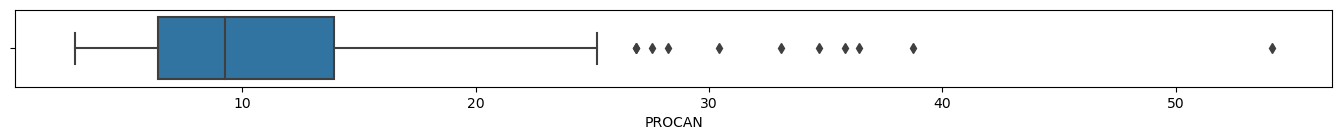

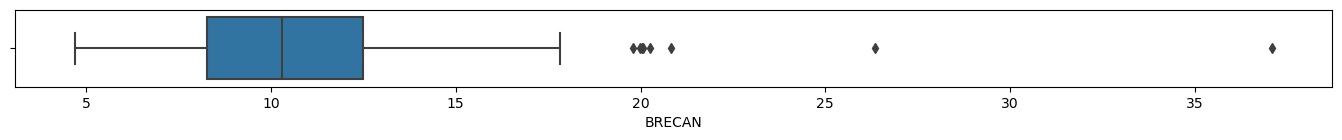

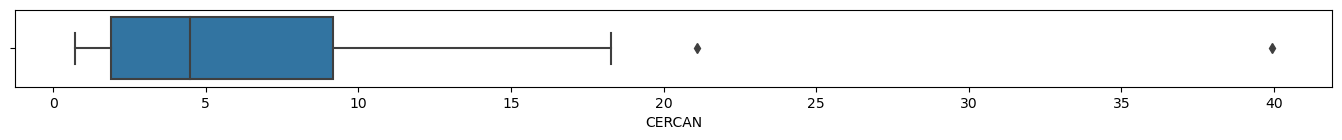

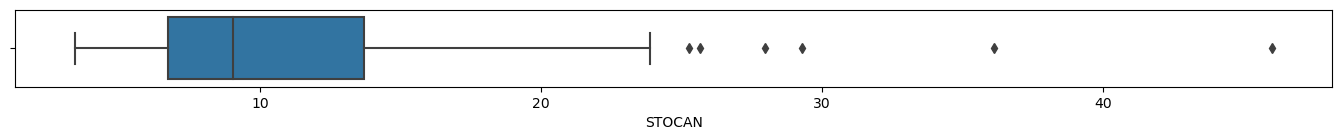

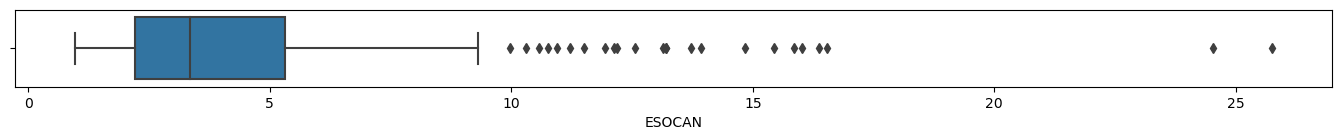

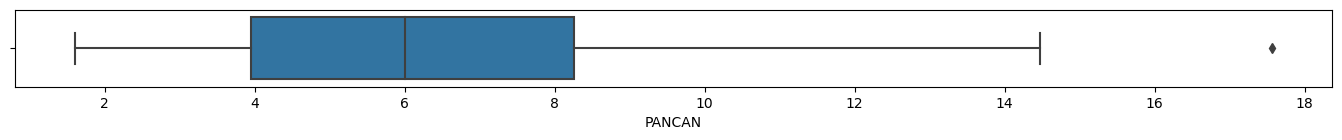

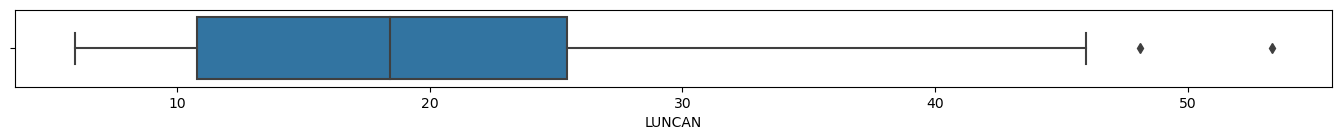

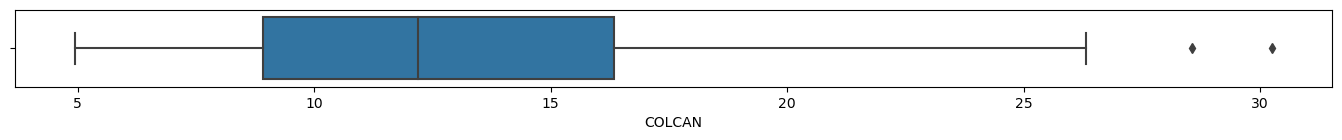

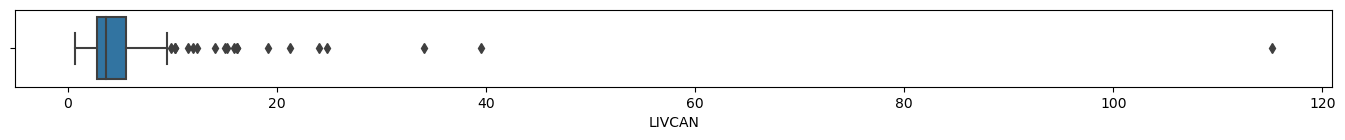

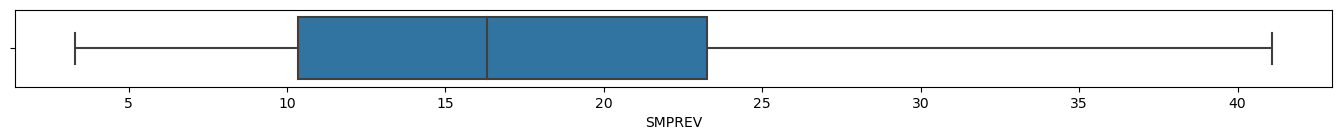

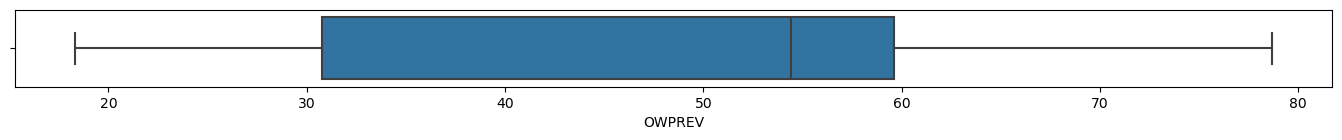

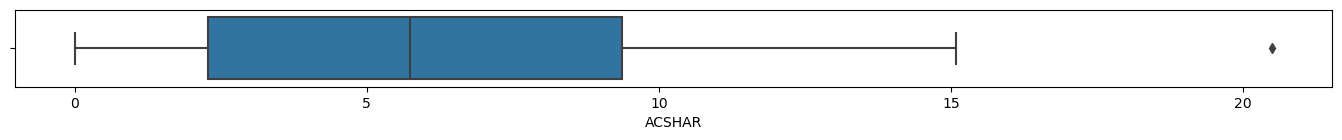

In [95]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in cancer_death_rate_cleaned_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_death_rate_cleaned_numeric, x=column)

### 1.4.4 Collinearity <a class="anchor" id="1.4.4"></a>

1. Majority of the numeric variables reported moderate to high correlation which were statistically significant.
2. Among pairwise combinations of numeric variables on cancer death rates, high Pearson.Correlation.Coefficient values were noted for:
    * <span style="color: #FF0000">PANCAN</span> and <span style="color: #FF0000">COLCAN</span>: Pearson.Correlation.Coefficient = +0.754
    * <span style="color: #FF0000">LUNCAN</span> and <span style="color: #FF0000">COLCAN</span>: Pearson.Correlation.Coefficient = +0.701
3. Among the numeric variables on cancer death rates, the highest Pearson.Correlation.Coefficient values against the <span style="color: #FF0000">SMPREV</span> variable were noted for:
    * <span style="color: #FF0000">SMPREV</span> and <span style="color: #FF0000">LUNCAN</span>: Pearson.Correlation.Coefficient = +0.642
    * <span style="color: #FF0000">SMPREV</span> and <span style="color: #FF0000">COLCAN</span>: Pearson.Correlation.Coefficient = +0.413
4. Among the numeric variables on cancer death rates, the highest Pearson.Correlation.Coefficient values against the <span style="color: #FF0000">OWPREV</span> variable were noted for:
    * <span style="color: #FF0000">OWPREV</span> and <span style="color: #FF0000">PANCAN</span>: Pearson.Correlation.Coefficient = +0.521
    * <span style="color: #FF0000">OWPREV</span> and <span style="color: #FF0000">COLCAN</span>: Pearson.Correlation.Coefficient = +0.410
5. Among the numeric variables on cancer death rates, the highest Pearson.Correlation.Coefficient values against the <span style="color: #FF0000">ACSHAR</span> variable were noted for:
    * <span style="color: #FF0000">ACSHAR</span> and <span style="color: #FF0000">COLCAN</span>: Pearson.Correlation.Coefficient = +0.582
    * <span style="color: #FF0000">ACSHAR</span> and <span style="color: #FF0000">PANCAN</span>: Pearson.Correlation.Coefficient = +0.575
6. No any variable was removed due to extreme multicollinearity. 


In [96]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
def plot_correlation_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, 
                ax=ax,
                mask=mask,
                annot=True, 
                vmin=-1, 
                vmax=1, 
                center=0,
                cmap='coolwarm', 
                linewidths=1, 
                linecolor='gray', 
                cbar_kws={'orientation': 'horizontal'})  

In [97]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# among pairs of numeric columns
##################################
cancer_death_rate_cleaned_numeric_correlation_pairs = {}
cancer_death_rate_cleaned_numeric_columns = cancer_death_rate_cleaned_numeric.columns.tolist()
for numeric_column_a, numeric_column_b in itertools.combinations(cancer_death_rate_cleaned_numeric_columns, 2):
    cancer_death_rate_cleaned_numeric_correlation_pairs[numeric_column_a + '_' + numeric_column_b] = stats.pearsonr(
        cancer_death_rate_cleaned_numeric.loc[:, numeric_column_a], 
        cancer_death_rate_cleaned_numeric.loc[:, numeric_column_b])

In [98]:
##################################
# Formulating the pairwise correlation summary
# for all numeric columns
##################################
cancer_death_rate_cleaned_numeric_summary = cancer_death_rate_cleaned_numeric.from_dict(cancer_death_rate_cleaned_numeric_correlation_pairs, orient='index')
cancer_death_rate_cleaned_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_death_rate_cleaned_numeric_summary.sort_values(by=['Pearson.Correlation.Coefficient'], ascending=False).head(20))

Pearson.Correlation.Coefficient  Correlation.PValue
PANCAN_COLCAN                           0.7537              0.0000
LUNCAN_COLCAN                           0.7010              0.0000
LUNCAN_SMPREV                           0.6415              0.0000
PANCAN_LUNCAN                           0.6367              0.0000
COLCAN_ACSHAR                           0.5819              0.0000
PANCAN_ACSHAR                           0.5750              0.0000
PANCAN_OWPREV                           0.5212              0.0000
CERCAN_ESOCAN                           0.4803              0.0000
LUNCAN_ACSHAR                           0.4330              0.0000
STOCAN_LIVCAN                           0.4291              0.0000
SMPREV_OWPREV                           0.4164              0.0000
COLCAN_SMPREV                           0.4126              0.0000
COLCAN_OWPREV                           0.4102              0.0000
LUNCAN_OWPREV                           0.4087              0.0000
PROCAN_BRECAN                           0.4081              0.0000
PROCAN_CERCAN                           0.3650              0.0000
PANCAN_SMPREV                           0.3603              0.0000
BRECAN_CERCAN                           0.3589              0.0000
ESOCAN_LIVCAN                           0.3009              0.0000
CERCAN_STOCAN                           0.2790              0.0001

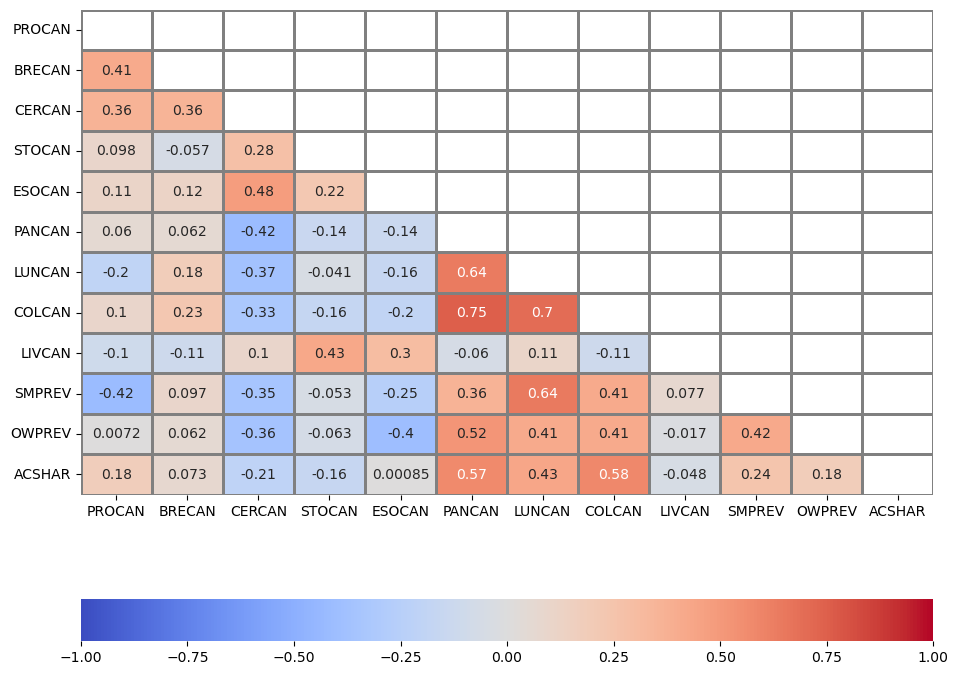

In [99]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
cancer_death_rate_cleaned_numeric_correlation = cancer_death_rate_cleaned_numeric.corr()
mask = np.triu(cancer_death_rate_cleaned_numeric_correlation)
plot_correlation_matrix(cancer_death_rate_cleaned_numeric_correlation,mask)
plt.show()

In [100]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
def correlation_significance(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

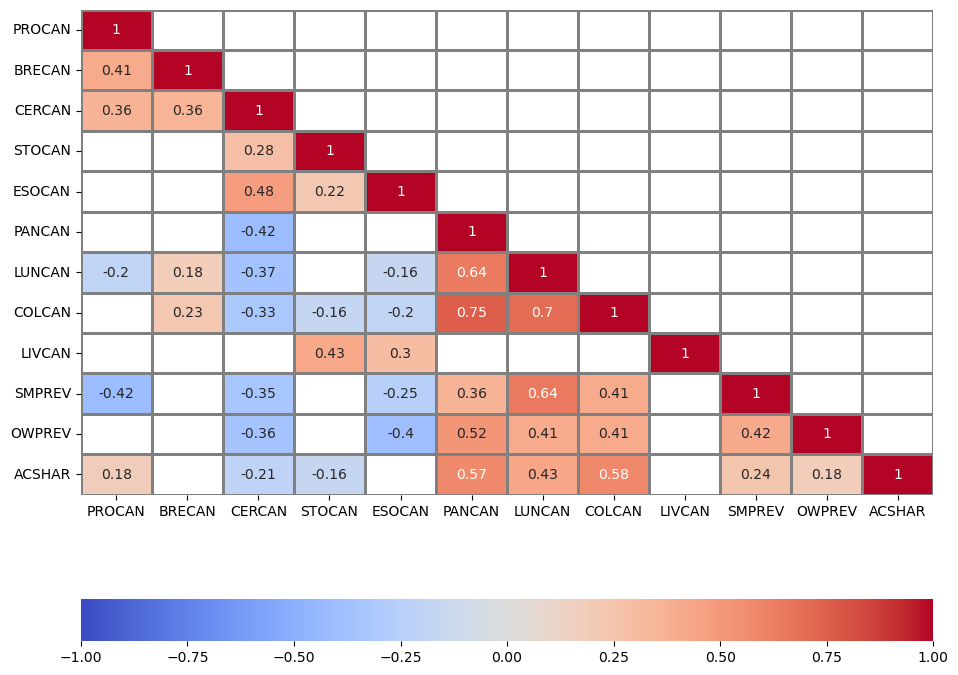

In [101]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
cancer_death_rate_cleaned_numeric_correlation_p_values = correlation_significance(cancer_death_rate_cleaned_numeric)                     
mask = np.invert(np.tril(cancer_death_rate_cleaned_numeric_correlation_p_values<0.05)) 
plot_correlation_matrix(cancer_death_rate_cleaned_numeric_correlation,mask)  

In [102]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_death_rate_cleaned_numeric.shape)

Dataset Dimensions: 


(183, 12)

### 1.4.5 Shape Transformation <a class="anchor" id="1.4.5"></a>

1. A Yeo-Johnson transformation was applied to all numeric variables to improve distributional shape.
2. All variables achieved symmetrical distributions with minimal outliers after transformation.


In [103]:
##################################
# Conducting a Yeo-Johnson Transformation
# to address the distributional
# shape of the variables
##################################
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',
                                          standardize=False)
cancer_death_rate_cleaned_numeric_array = yeo_johnson_transformer.fit_transform(cancer_death_rate_cleaned_numeric)

In [104]:
##################################
# Formulating a new dataset object
# for the transformed data
##################################
cancer_death_rate_transformed_numeric = pd.DataFrame(cancer_death_rate_cleaned_numeric_array,
                                               columns=cancer_death_rate_cleaned_numeric.columns)

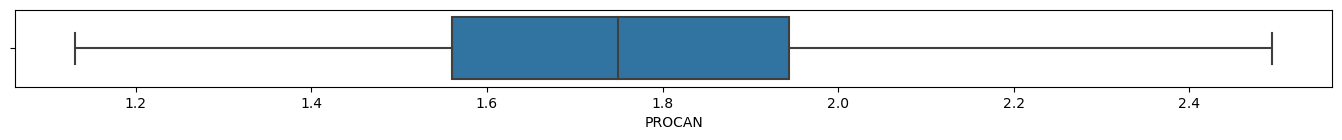

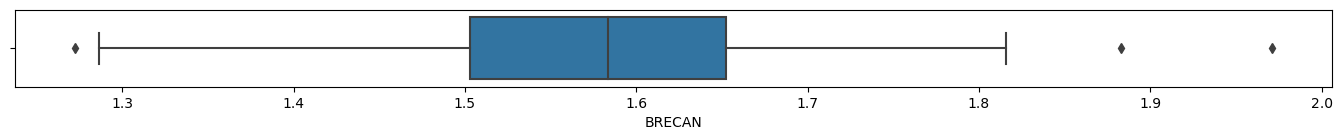

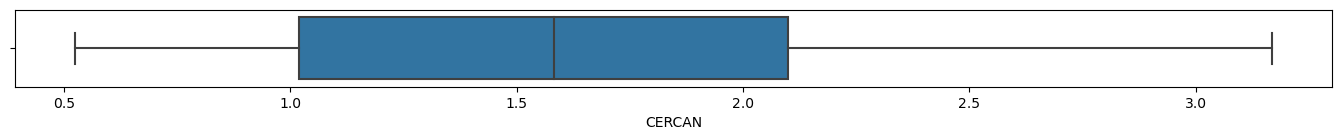

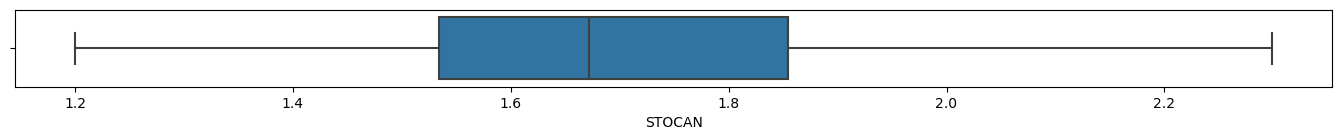

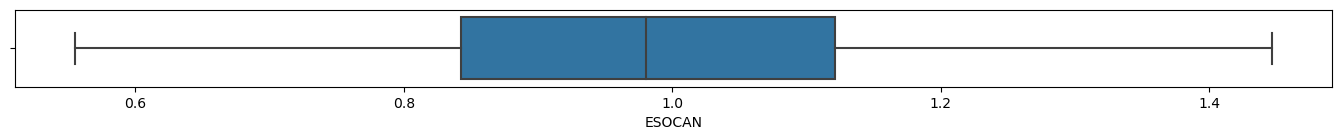

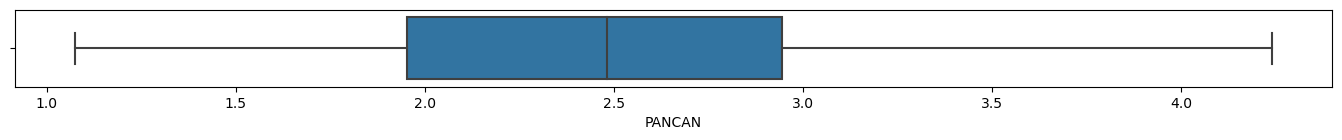

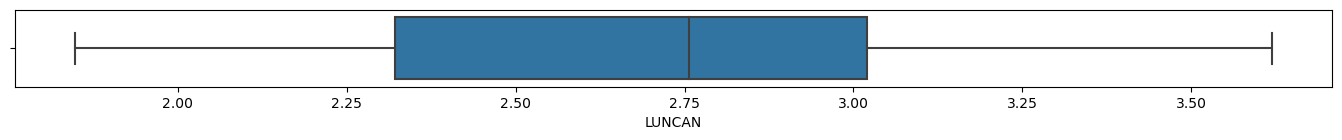

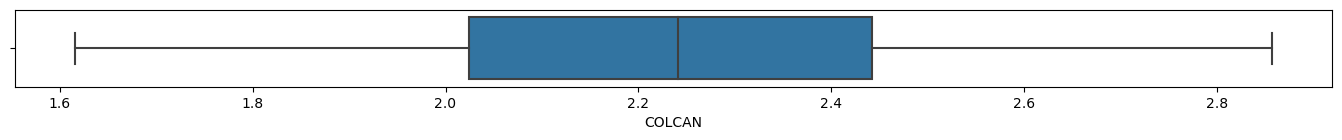

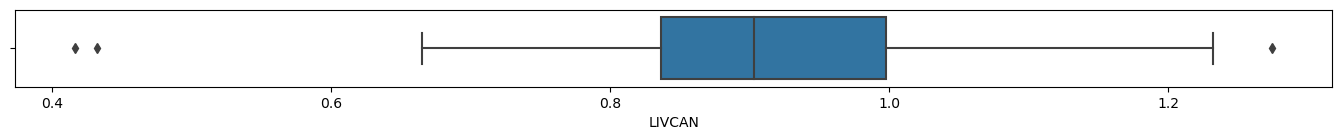

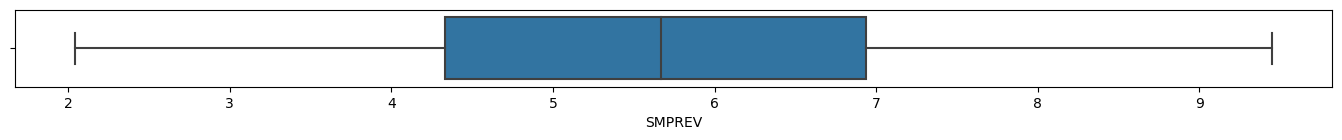

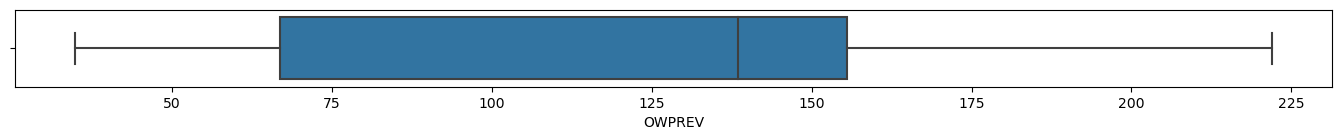

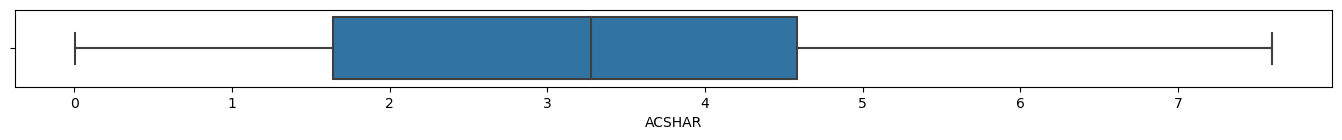

In [105]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cancer_death_rate_transformed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_death_rate_transformed_numeric, x=column)

In [106]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_death_rate_transformed_numeric.shape)

Dataset Dimensions: 


(183, 12)

### 1.4.6 Centering and Scaling <a class="anchor" id="1.4.6"></a>

1. All numeric variables were transformed using the standardization method to achieve a comparable scale between values.


In [107]:
##################################
# Conducting standardization
# to transform the values of the 
# variables into comparable scale
##################################
standardization_scaler = StandardScaler()
cancer_death_rate_transformed_numeric_array = standardization_scaler.fit_transform(cancer_death_rate_transformed_numeric)

In [108]:
##################################
# Formulating a new dataset object
# for the scaled data
##################################
cancer_death_rate_scaled_numeric = pd.DataFrame(cancer_death_rate_transformed_numeric_array,
                                          columns=cancer_death_rate_transformed_numeric.columns)

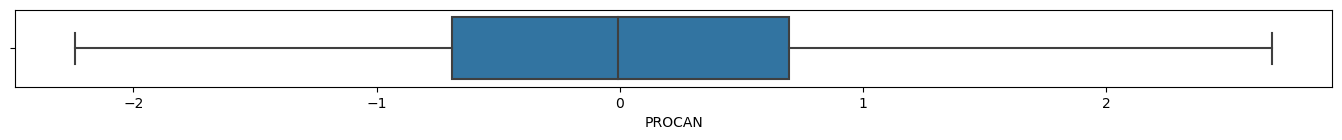

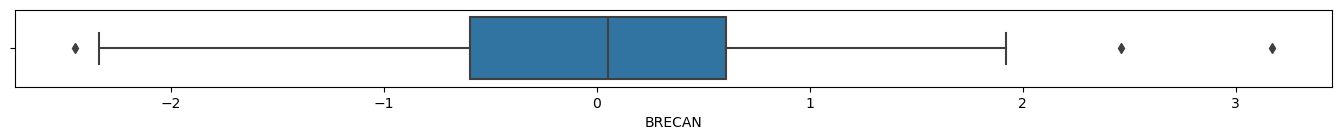

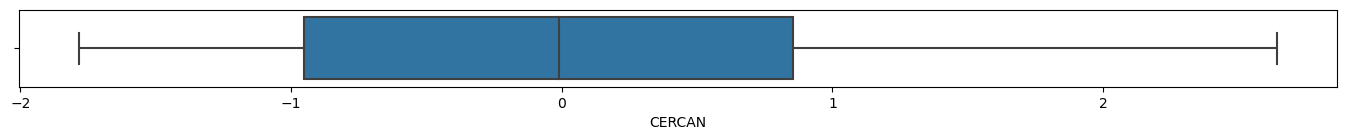

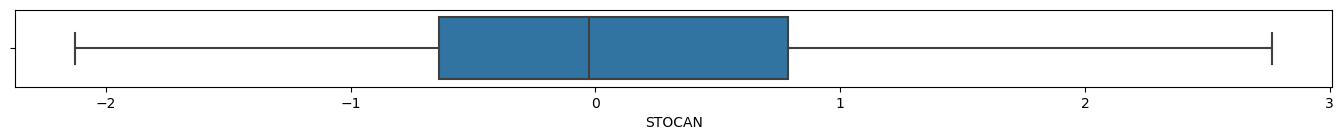

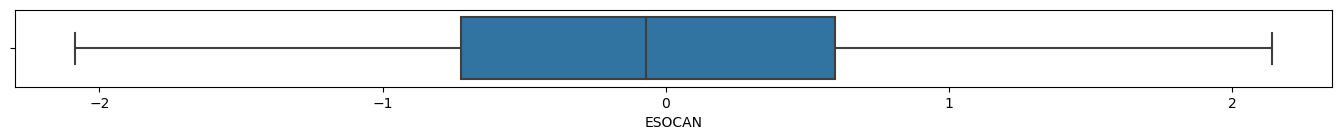

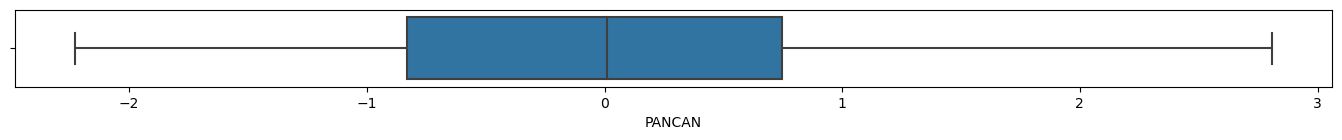

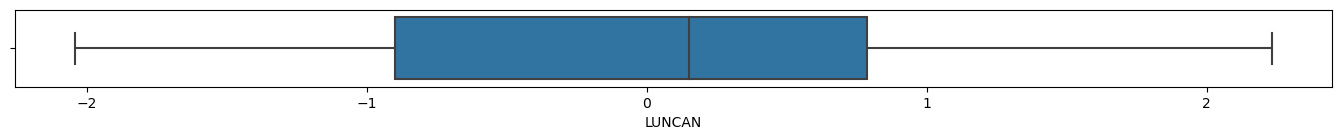

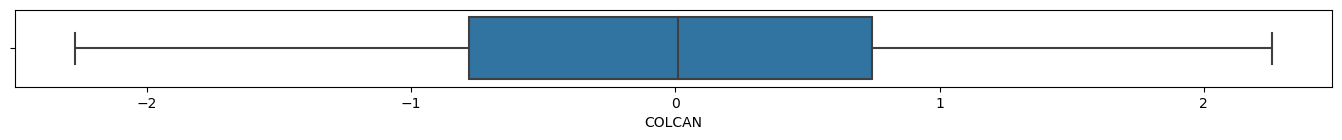

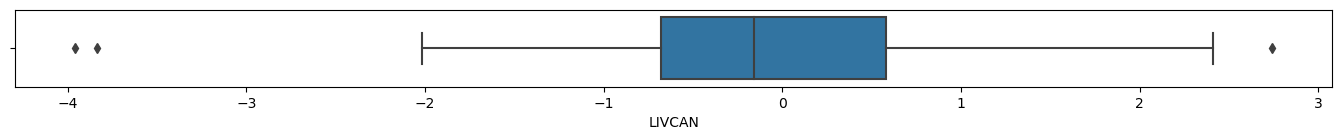

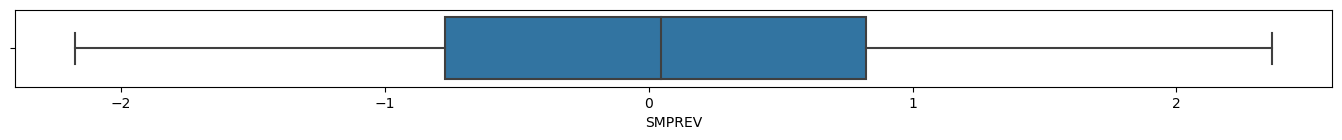

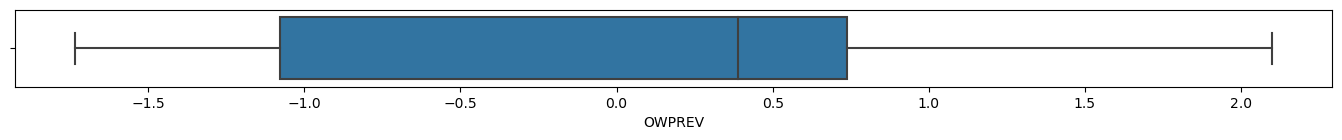

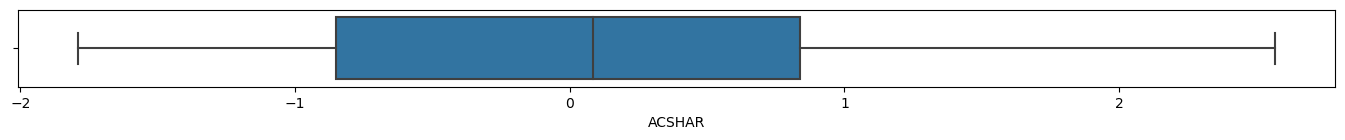

In [109]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cancer_death_rate_scaled_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_death_rate_scaled_numeric, x=column)

### 1.4.8 Preprocessed Data Description <a class="anchor" id="1.4.8"></a>

1. The preprocessed dataset is comprised of:
    * **183 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **2/15 metadata** (numeric)
            * <span style="color: #FF0000">GEOLAT</span>
            * <span style="color: #FF0000">GEOLON</span>
        * **9/15 clustering descriptors** (numeric)
             * <span style="color: #FF0000">PROCAN</span>
             * <span style="color: #FF0000">BRECAN</span>
             * <span style="color: #FF0000">CERCAN</span>
             * <span style="color: #FF0000">STOCAN</span>
             * <span style="color: #FF0000">ESOCAN</span>
             * <span style="color: #FF0000">PANCAN</span>
             * <span style="color: #FF0000">LUNCAN</span>
             * <span style="color: #FF0000">COLCAN</span>
             * <span style="color: #FF0000">LIVCAN</span>    
        * **3/15 target descriptors** (numeric)
             * <span style="color: #FF0000">SMPREV</span>
             * <span style="color: #FF0000">OWPREV</span>
             * <span style="color: #FF0000">ACSHAR</span>
             

In [110]:
##################################
# Consolidating both numeric columns
# and geolocation data
##################################
cancer_death_rate_preprocessed = pd.concat([cancer_death_rate_scaled_numeric,cancer_death_rate_cleaned_numeric_geolocation], axis=1, join='inner')  

In [111]:
##################################
# Performing a general exploration of the consolidated dataset
##################################
print('Dataset Dimensions: ')
display(cancer_death_rate_preprocessed.shape)

Dataset Dimensions: 


(162, 14)

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. Bivariate analysis identified individual descriptors with generally linear relationship to the target descriptor based on visual inspection.
2. Linear relationships for the following descriptors and <span style="color: #FF0000">SMPREV</span> variables were observed: 
    * <span style="color: #FF0000">LUNCAN</span>
    * <span style="color: #FF0000">COLCAN</span>    
3. Linear relationships for the following descriptors and <span style="color: #FF0000">OWPREV</span> variables were observed: 
    * <span style="color: #FF0000">PANCAN</span>
    * <span style="color: #FF0000">COLCAN</span>  
4. Linear relationships for the following descriptors and <span style="color: #FF0000">ACSHAR</span> variables were observed: 
    * <span style="color: #FF0000">COLCAN</span>
    * <span style="color: #FF0000">PANCAN</span>  
    

In [112]:
##################################
# Segregating the target
# and descriptor variable lists
##################################
cancer_death_rate_preprocessed_target_SMPREV = ['SMPREV']
cancer_death_rate_preprocessed_target_OWPREV = ['OWPREV']
cancer_death_rate_preprocessed_target_ACSHAR = ['ACSHAR']
cancer_death_rate_preprocessed_descriptors = cancer_death_rate_preprocessed.drop(['SMPREV','OWPREV','ACSHAR','GEOLAT','GEOLON'], axis=1).columns

In [113]:
##################################
# Segregating the target using SMPREV
# and descriptor variable names
##################################
y_variable = 'SMPREV'
x_variables = cancer_death_rate_preprocessed_descriptors

In [114]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 3
num_cols = 3

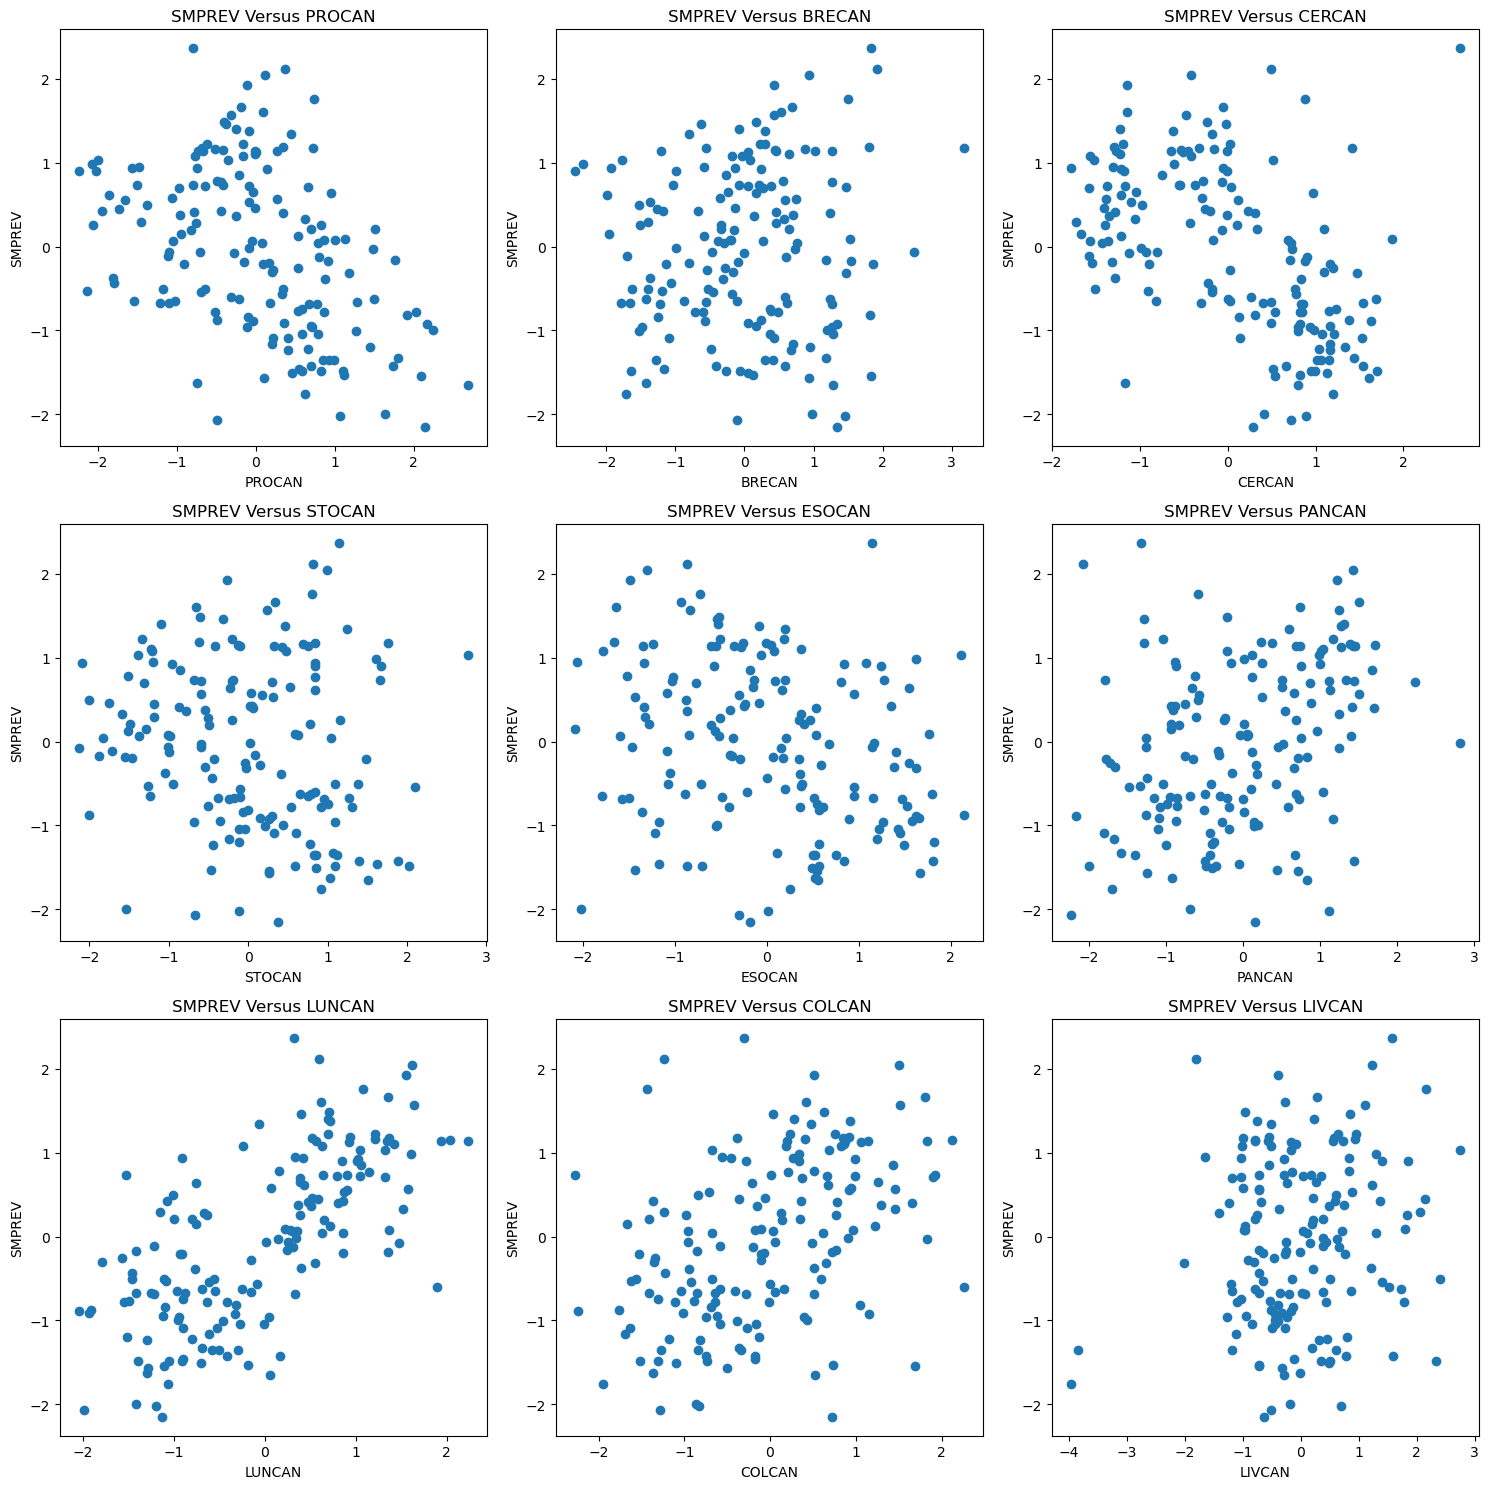

In [115]:
##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual scatterplots
# for all scaled numeric columns
##################################
for i, x_variable in enumerate(x_variables):
    ax = axes[i]
    ax.scatter(cancer_death_rate_preprocessed[x_variable],cancer_death_rate_preprocessed[y_variable])
    ax.set_title(f'{y_variable} Versus {x_variable}')
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

In [116]:
##################################
# Segregating the target using OWPREV
# and descriptor variable names
##################################
y_variable = 'OWPREV'
x_variables = cancer_death_rate_preprocessed_descriptors

In [117]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 3
num_cols = 3

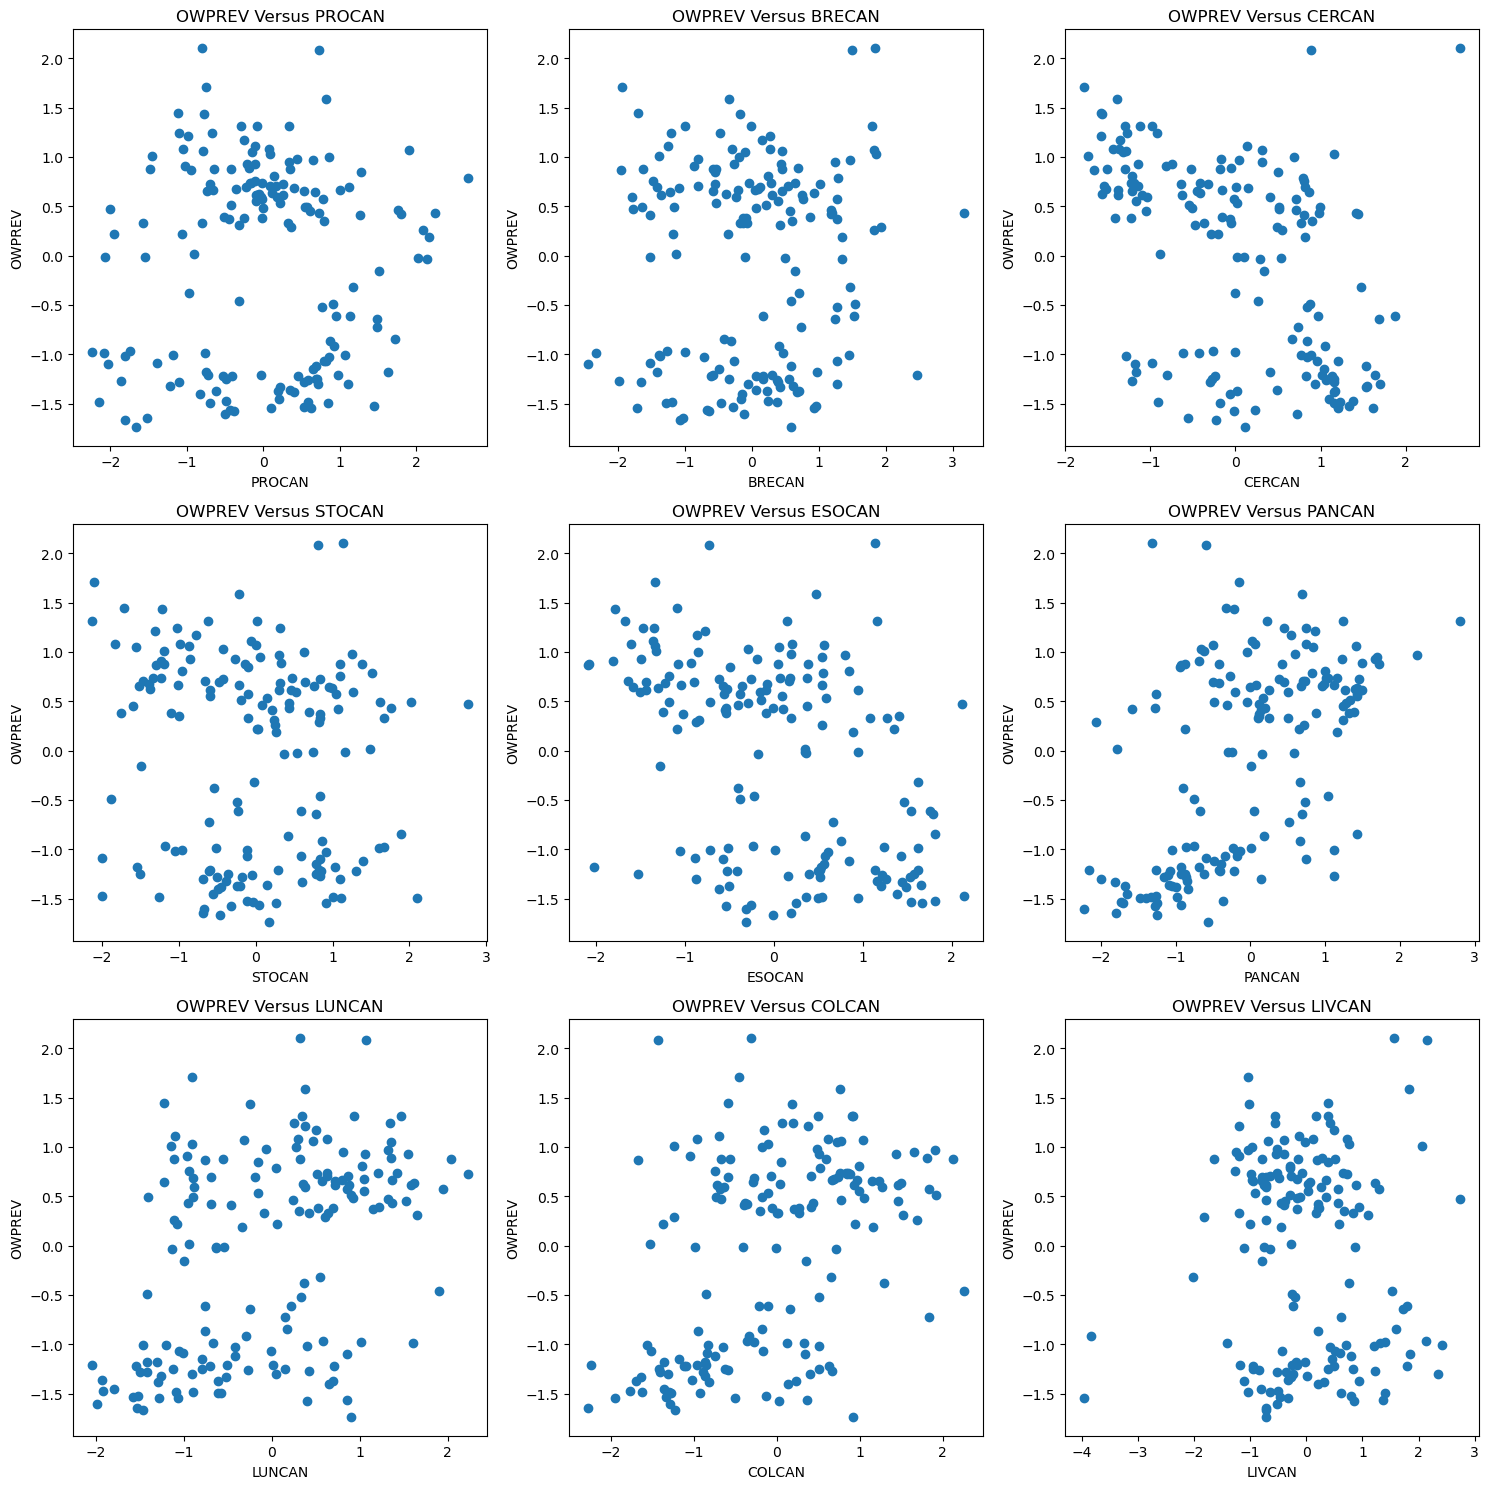

In [118]:
##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual scatterplots
# for all scaled numeric columns
##################################
for i, x_variable in enumerate(x_variables):
    ax = axes[i]
    ax.scatter(cancer_death_rate_preprocessed[x_variable],cancer_death_rate_preprocessed[y_variable])
    ax.set_title(f'{y_variable} Versus {x_variable}')
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

In [119]:
##################################
# Segregating the target using ACSHAR
# and descriptor variable names
##################################
y_variable = 'ACSHAR'
x_variables = cancer_death_rate_preprocessed_descriptors

In [120]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 3
num_cols = 3

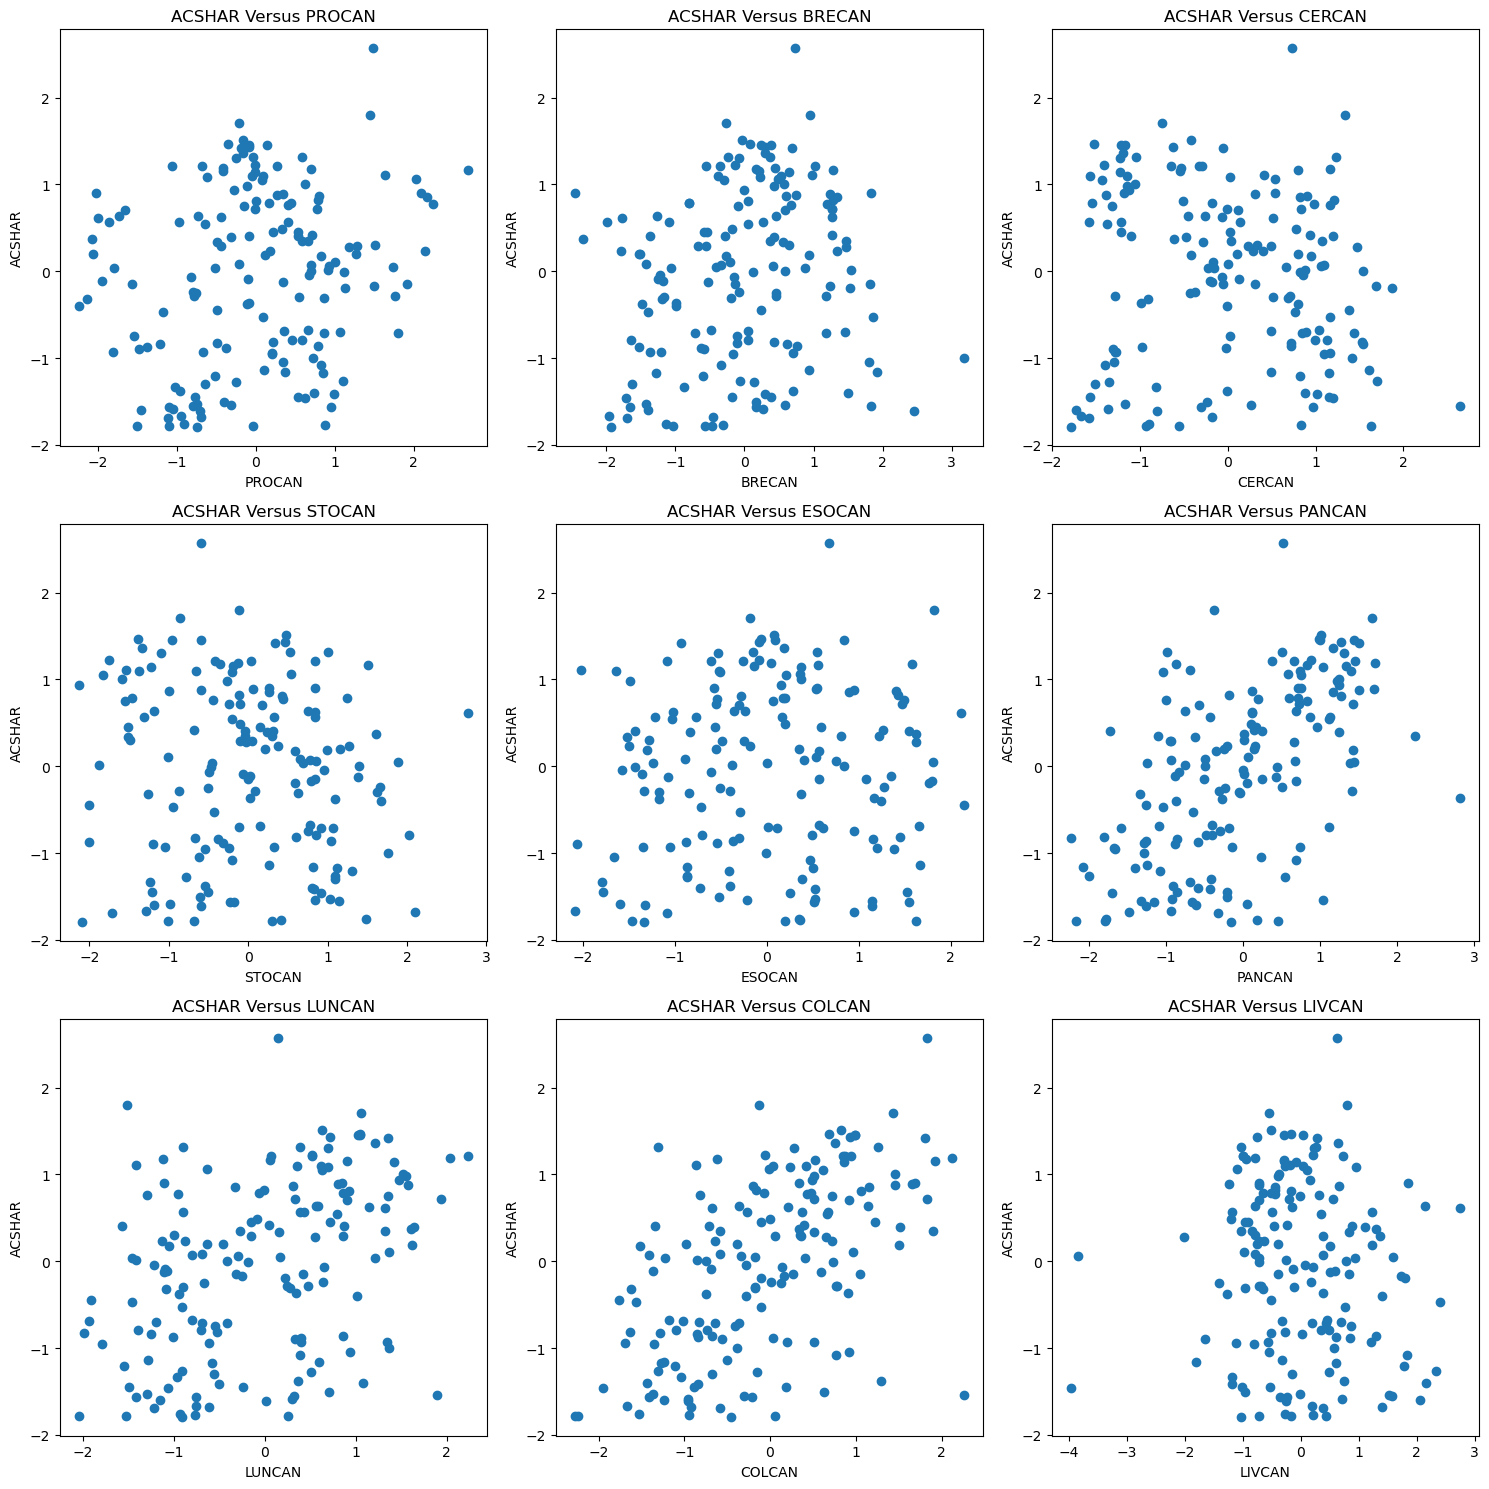

In [121]:
##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual scatterplots
# for all scaled numeric columns
##################################
for i, x_variable in enumerate(x_variables):
    ax = axes[i]
    ax.scatter(cancer_death_rate_preprocessed[x_variable],cancer_death_rate_preprocessed[y_variable])
    ax.set_title(f'{y_variable} Versus {x_variable}')
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric descriptors to the <span style="color: #FF0000">CANRAT</span> target descriptors were statistically evaluated using the following hypotheses:
    * **Null**: Pearson correlation coefficient is equal to zero 
    * **Alternative**: Pearson correlation coefficient is not equal to zero    
2. There is sufficient evidence to conclude of a statistically significant linear relationship between the <span style="color: #FF0000">SMPREV</span> target descriptor and 6 of the 9 numeric descriptors given their high Pearson correlation coefficient values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">LUNCAN</span>: Pearson.Correlation.Coefficient=+0.684, Correlation.PValue=0.000
    * <span style="color: #FF0000">CERCAN</span>: Pearson.Correlation.Coefficient=-0.494, Correlation.PValue=0.000   
    * <span style="color: #FF0000">PROCAN</span>: Pearson.Correlation.Coefficient=-0.438, Correlation.PValue=0.000 
    * <span style="color: #FF0000">COLCAN</span>: Pearson.Correlation.Coefficient=+0.420, Correlation.PValue=0.000 
    * <span style="color: #FF0000">PANCAN</span>: Pearson.Correlation.Coefficient=+0.343, Correlation.PValue=0.000 
    * <span style="color: #FF0000">ESOCAN</span>: Pearson.Correlation.Coefficient=-0.262, Correlation.PValue=0.001 
3. There is sufficient evidence to conclude of a statistically significant linear relationship between the <span style="color: #FF0000">OWPREV</span> target descriptor and 5 of the 9 numeric descriptors given their high Pearson correlation coefficient values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">PANCAN</span>: Pearson.Correlation.Coefficient=+0.684, Correlation.PValue=0.000
    * <span style="color: #FF0000">CERCAN</span>: Pearson.Correlation.Coefficient=-0.494, Correlation.PValue=0.000   
    * <span style="color: #FF0000">LUNCAN</span>: Pearson.Correlation.Coefficient=+0.438, Correlation.PValue=0.000 
    * <span style="color: #FF0000">COLCAN</span>: Pearson.Correlation.Coefficient=+0.420, Correlation.PValue=0.000 
    * <span style="color: #FF0000">ESOCAN</span>: Pearson.Correlation.Coefficient=-0.343, Correlation.PValue=0.000 
4. There is sufficient evidence to conclude of a statistically significant linear relationship between the <span style="color: #FF0000">ACSHAR</span> target descriptor and 5 of the 9 numeric descriptors given their high Pearson correlation coefficient values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">PANCAN</span>: Pearson.Correlation.Coefficient=+0.567, Correlation.PValue=0.000
    * <span style="color: #FF0000">COLCAN</span>: Pearson.Correlation.Coefficient=+0.564, Correlation.PValue=0.000   
    * <span style="color: #FF0000">LUNCAN</span>: Pearson.Correlation.Coefficient=+0.399, Correlation.PValue=0.000 
    * <span style="color: #FF0000">PROCAN</span>: Pearson.Correlation.Coefficient=+0.201, Correlation.PValue=0.010 
    * <span style="color: #FF0000">BRECAN</span>: Pearson.Correlation.Coefficient=+0.174, Correlation.PValue=0.026


In [122]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# between the target descriptor using SMPREV
# and numeric descriptor columns
##################################
cancer_death_rate_preprocessed_numeric_correlation_target = {}
cancer_death_rate_preprocessed_numeric = cancer_death_rate_preprocessed.drop(['OWPREV','ACSHAR','GEOLAT','GEOLON'], axis=1)
cancer_death_rate_preprocessed_numeric_columns = cancer_death_rate_preprocessed_numeric.columns.tolist()
for numeric_column in cancer_death_rate_preprocessed_numeric_columns:
    cancer_death_rate_preprocessed_numeric_correlation_target['SMPREV_' + numeric_column] = stats.pearsonr(
        cancer_death_rate_preprocessed_numeric.loc[:, 'SMPREV'], 
        cancer_death_rate_preprocessed_numeric.loc[:, numeric_column])

In [123]:
##################################
# Formulating the pairwise correlation summary
# between the target descriptor
# and numeric descriptor columns
##################################
cancer_death_rate_preprocessed_numeric_summary = cancer_death_rate_preprocessed_numeric.from_dict(cancer_death_rate_preprocessed_numeric_correlation_target, orient='index')
cancer_death_rate_preprocessed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_death_rate_preprocessed_numeric_summary.sort_values(by=['Correlation.PValue'], ascending=True).head(10))

Pearson.Correlation.Coefficient  Correlation.PValue
SMPREV_SMPREV                           1.0000              0.0000
SMPREV_LUNCAN                           0.6844              0.0000
SMPREV_CERCAN                          -0.4947              0.0000
SMPREV_PROCAN                          -0.4384              0.0000
SMPREV_COLCAN                           0.4201              0.0000
SMPREV_PANCAN                           0.3431              0.0000
SMPREV_ESOCAN                          -0.2621              0.0008
SMPREV_LIVCAN                           0.1469              0.0621
SMPREV_STOCAN                          -0.1396              0.0765
SMPREV_BRECAN                           0.0612              0.4394

In [124]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# between the target descriptor using OWPREV
# and numeric descriptor columns
##################################
cancer_death_rate_preprocessed_numeric_correlation_target = {}
cancer_death_rate_preprocessed_numeric = cancer_death_rate_preprocessed.drop(['SMPREV','ACSHAR','GEOLAT','GEOLON'], axis=1)
cancer_death_rate_preprocessed_numeric_columns = cancer_death_rate_preprocessed_numeric.columns.tolist()
for numeric_column in cancer_death_rate_preprocessed_numeric_columns:
    cancer_death_rate_preprocessed_numeric_correlation_target['OWPREV_' + numeric_column] = stats.pearsonr(
        cancer_death_rate_preprocessed_numeric.loc[:, 'OWPREV'], 
        cancer_death_rate_preprocessed_numeric.loc[:, numeric_column])

In [125]:
##################################
# Formulating the pairwise correlation summary
# between the target descriptor
# and numeric descriptor columns
##################################
cancer_death_rate_preprocessed_numeric_summary = cancer_death_rate_preprocessed_numeric.from_dict(cancer_death_rate_preprocessed_numeric_correlation_target, orient='index')
cancer_death_rate_preprocessed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_death_rate_preprocessed_numeric_summary.sort_values(by=['Correlation.PValue'], ascending=True).head(10))

Pearson.Correlation.Coefficient  Correlation.PValue
OWPREV_OWPREV                           1.0000              0.0000
OWPREV_PANCAN                           0.5395              0.0000
OWPREV_CERCAN                          -0.4599              0.0000
OWPREV_LUNCAN                           0.4405              0.0000
OWPREV_COLCAN                           0.4403              0.0000
OWPREV_ESOCAN                          -0.4346              0.0000
OWPREV_STOCAN                          -0.1129              0.1524
OWPREV_BRECAN                           0.0531              0.5025
OWPREV_PROCAN                           0.0425              0.5916
OWPREV_LIVCAN                          -0.0418              0.5978

In [126]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# between the target descriptor using ACSHAR
# and numeric descriptor columns
##################################
cancer_death_rate_preprocessed_numeric_correlation_target = {}
cancer_death_rate_preprocessed_numeric = cancer_death_rate_preprocessed.drop(['SMPREV','OWPREV','GEOLAT','GEOLON'], axis=1)
cancer_death_rate_preprocessed_numeric_columns = cancer_death_rate_preprocessed_numeric.columns.tolist()
for numeric_column in cancer_death_rate_preprocessed_numeric_columns:
    cancer_death_rate_preprocessed_numeric_correlation_target['ACSHAR_' + numeric_column] = stats.pearsonr(
        cancer_death_rate_preprocessed_numeric.loc[:, 'ACSHAR'], 
        cancer_death_rate_preprocessed_numeric.loc[:, numeric_column])

In [127]:
##################################
# Formulating the pairwise correlation summary
# between the target descriptor
# and numeric descriptor columns
##################################
cancer_death_rate_preprocessed_numeric_summary = cancer_death_rate_preprocessed_numeric.from_dict(cancer_death_rate_preprocessed_numeric_correlation_target, orient='index')
cancer_death_rate_preprocessed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_death_rate_preprocessed_numeric_summary.sort_values(by=['Correlation.PValue'], ascending=True).head(10))

Pearson.Correlation.Coefficient  Correlation.PValue
ACSHAR_ACSHAR                           1.0000              0.0000
ACSHAR_PANCAN                           0.5676              0.0000
ACSHAR_COLCAN                           0.5642              0.0000
ACSHAR_LUNCAN                           0.3998              0.0000
ACSHAR_PROCAN                           0.2006              0.0105
ACSHAR_BRECAN                           0.1749              0.0260
ACSHAR_CERCAN                          -0.1181              0.1344
ACSHAR_STOCAN                          -0.1169              0.1385
ACSHAR_LIVCAN                          -0.0887              0.2619
ACSHAR_ESOCAN                           0.0602              0.4465

## 1.6. Model Development <a class="anchor" id="1.6"></a>

### 1.6.1 Premodelling Data Description <a class="anchor" id="1.6.1"></a>

1. Among the 9 numeric descriptors, <span style="color: #FF0000">LIVCAN</span> and <span style="color: #FF0000">STOCAN</span> have not demonstrated a statistically significant linear relationship between the <span style="color: #FF0000">SMPREV</span>, <span style="color: #FF0000">OWPREV</span> nad , <span style="color: #FF0000">ACSHAR</span> target descriptors.
2. All 9 numeric descriptors were however retained for the clustering analysis.


In [128]:
##################################
# Consolidating relevant numeric columns
# and encoded categorical columns
# after hypothesis testing
##################################
cancer_death_rate_premodelling = cancer_death_rate_preprocessed.drop(['GEOLAT','GEOLON'], axis=1)

In [129]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_death_rate_premodelling.shape)

Dataset Dimensions: 


(162, 12)

In [130]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_death_rate_premodelling.dtypes)

Column Names and Data Types:


PROCAN    float64
BRECAN    float64
CERCAN    float64
STOCAN    float64
ESOCAN    float64
PANCAN    float64
LUNCAN    float64
COLCAN    float64
LIVCAN    float64
SMPREV    float64
OWPREV    float64
ACSHAR    float64
dtype: object

In [131]:
##################################
# Taking a snapshot of the dataset
##################################
cancer_death_rate_premodelling.head()

PROCAN  BRECAN  CERCAN  STOCAN  ESOCAN  PANCAN  LUNCAN  COLCAN  LIVCAN  \
0 -0.6922 -0.4550 -0.1771  2.0964  0.9425 -1.4794 -0.6095 -0.9258  1.4059   
1 -0.0867 -1.3608 -1.1020  0.3084 -1.4329  0.2506  0.8754 -0.7177  0.8924   
2 -1.0261 -0.8704 -0.8184 -1.2331 -1.8001 -0.6858 -0.9625 -1.0428 -1.1914   
4  0.5801  0.3703  1.0686 -0.0427  1.2150 -1.1052 -0.2718 -0.5826 -0.8379   
5  2.1397  1.3384  0.2846  0.3752 -0.1795  0.1509 -1.1314  0.7189 -0.6376   

   SMPREV  OWPREV  ACSHAR  
0 -0.5405 -1.4979 -1.6782  
1  0.5329  0.6090  0.4008  
2 -0.6438  0.9033 -1.3345  
4 -1.0431 -1.2574  0.3520  
5 -2.1494 -0.0314  0.2304

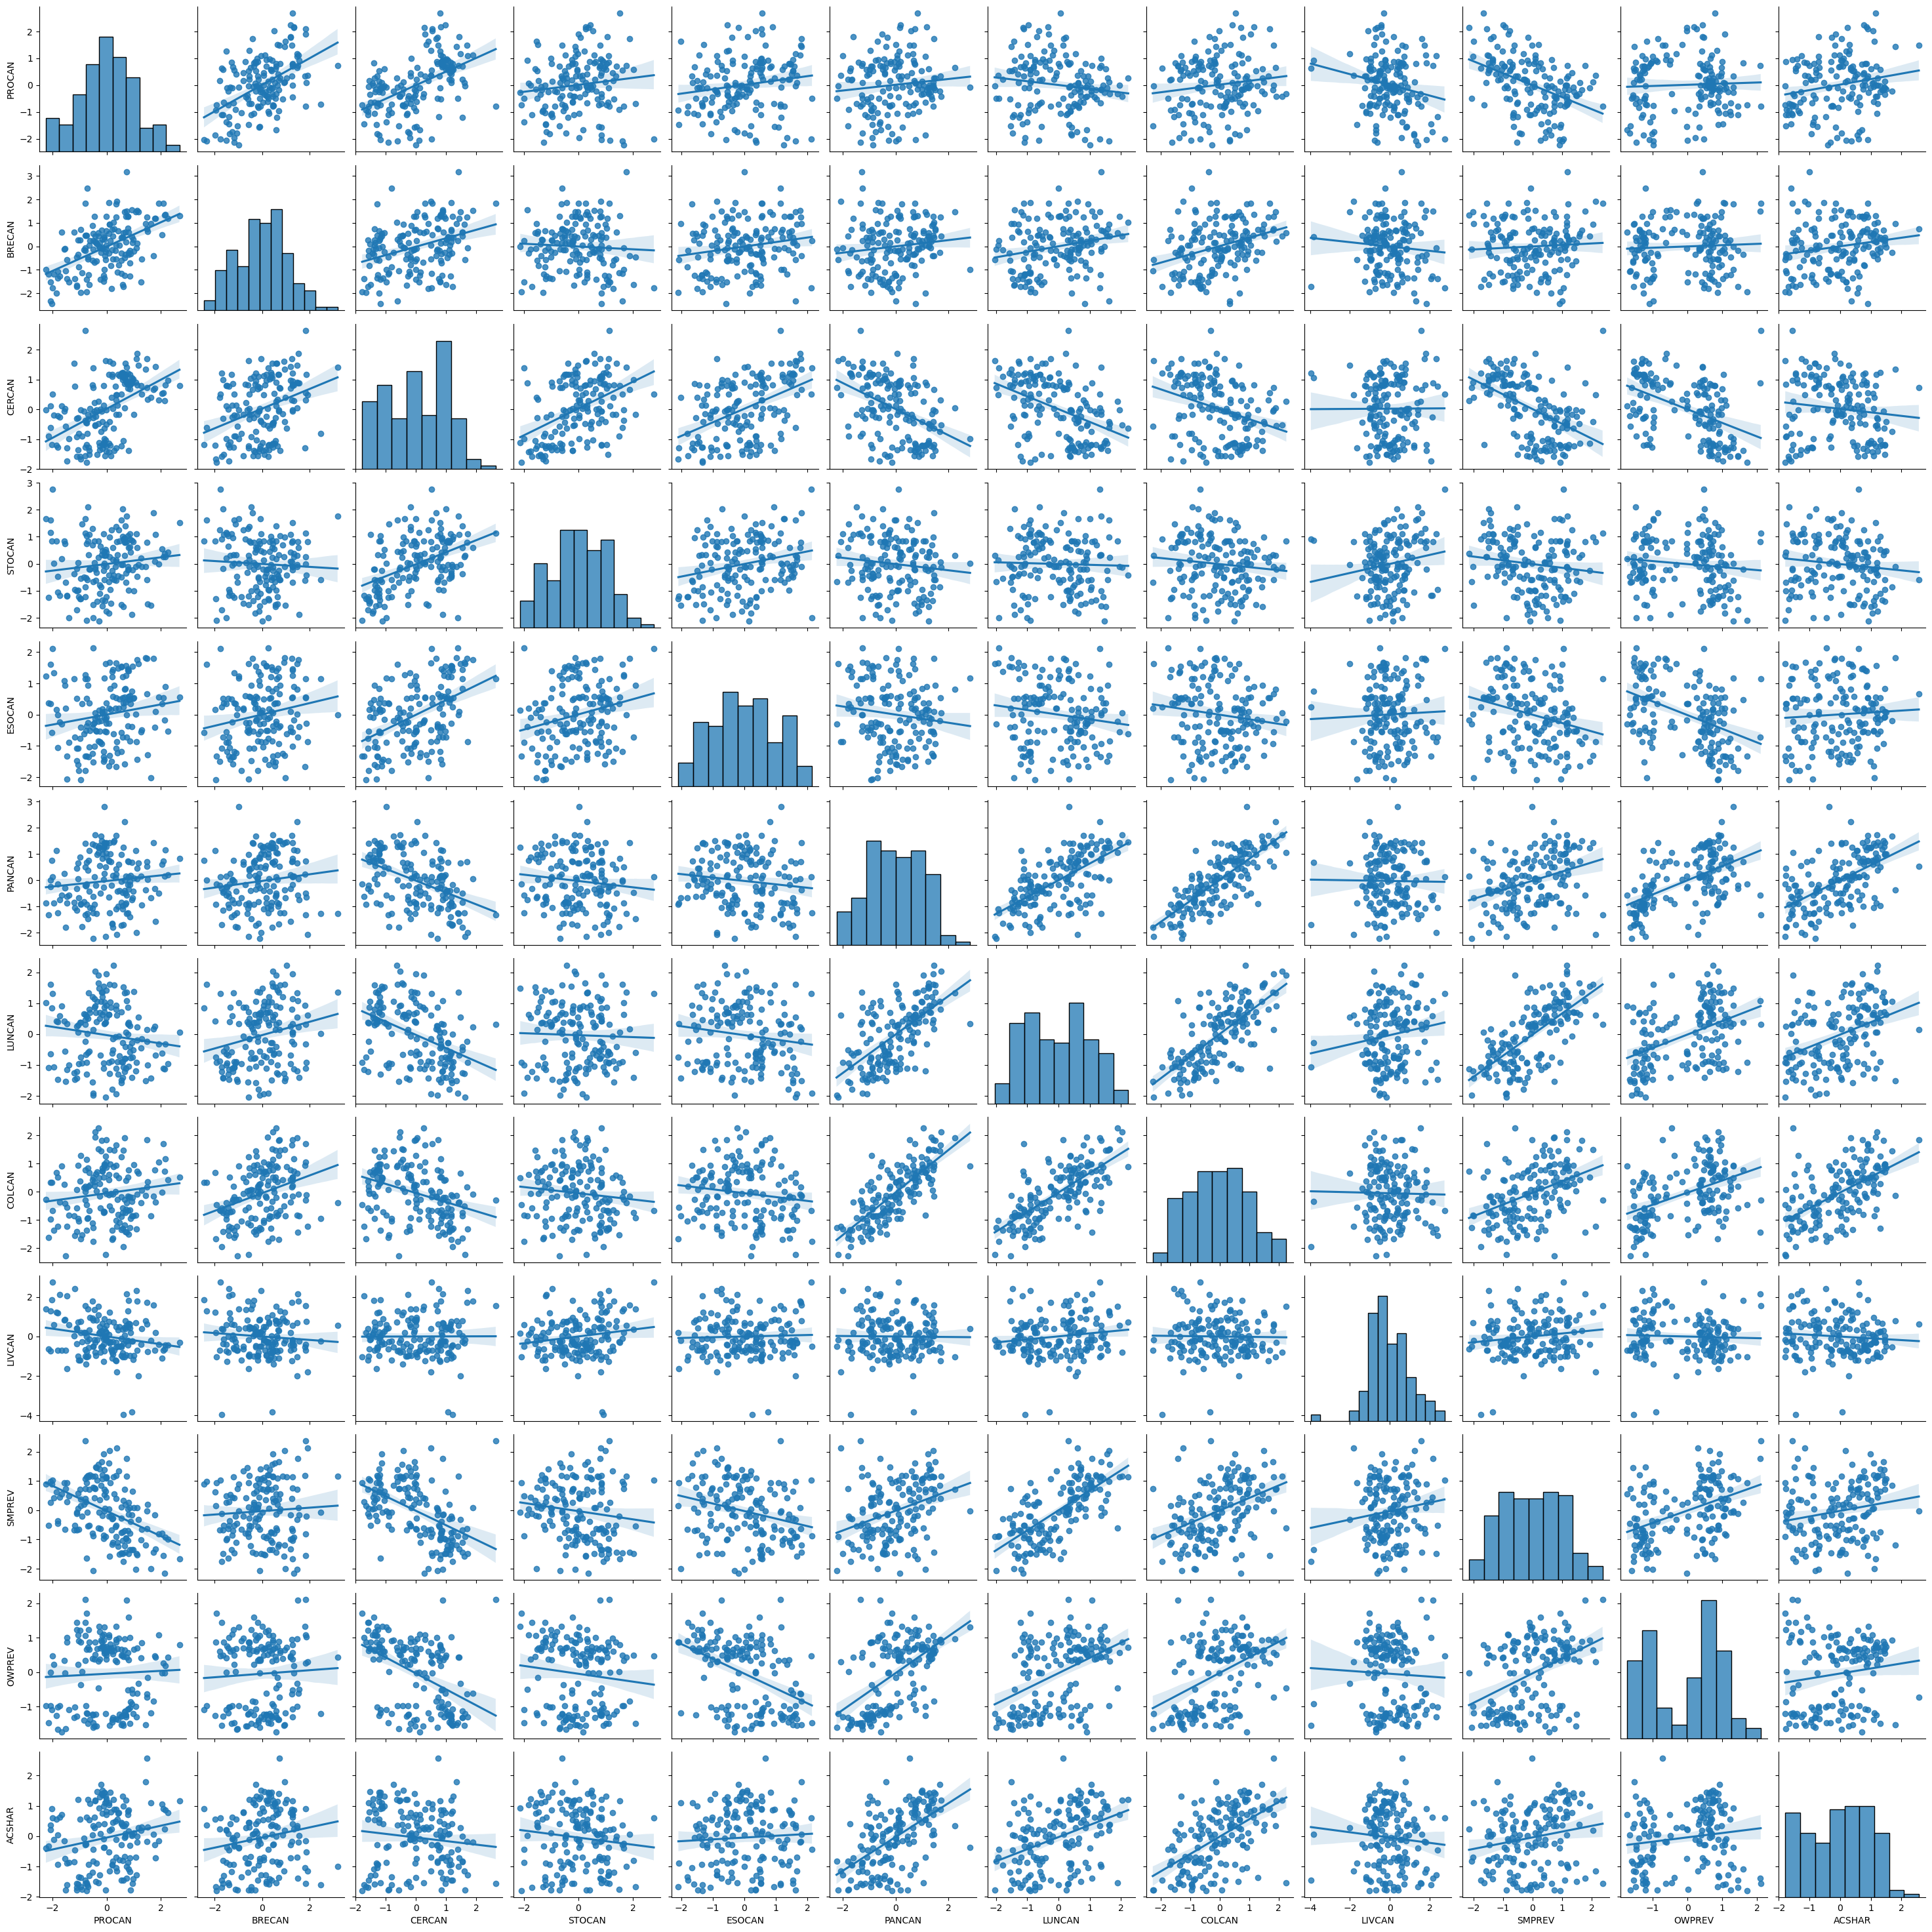

In [132]:
##################################
# Gathering the pairplot for all variables
##################################
sns.pairplot(cancer_death_rate_premodelling, kind='reg')
plt.show()

### 1.6.2 K-Means Clustering <a class="anchor" id="1.6.2"></a>


### 1.6.3 Affinity Propagation Clustering <a class="anchor" id="1.6.3"></a>


### 1.6.4 Mean Shift Clustering <a class="anchor" id="1.6.4"></a>


### 1.6.5 Spectral Clustering <a class="anchor" id="1.6.5"></a>


### 1.6.6 Agglomerative Clustering <a class="anchor" id="1.6.6"></a>


## 1.7. Consolidated Findings <a class="anchor" id="1.7"></a>


# 2. Summary <a class="anchor" id="Summary"></a>

A detailed report was formulated documenting all the analysis steps and findings.


# 3. References <a class="anchor" id="References"></a>
* **[Book]** [Data Preparation for Machine Learning: Data Cleaning, Feature Selection, and Data Transforms in Python](https://machinelearningmastery.com/data-preparation-for-machine-learning/) by Jason Brownlee
* **[Book]** [Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson
* **[Book]** [Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/) by Alice Zheng and Amanda Casari
* **[Book]** [Applied Predictive Modeling](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) by Max Kuhn and Kjell Johnson
* **[Book]** [Data Mining: Practical Machine Learning Tools and Techniques](https://www.sciencedirect.com/book/9780123748560/data-mining-practical-machine-learning-tools-and-techniques?via=ihub=) by Ian Witten, Eibe Frank, Mark Hall and Christopher Pal 
* **[Book]** [Data Cleaning](https://dl.acm.org/doi/book/10.1145/3310205) by Ihab Ilyas and Xu Chu
* **[Book]** [Data Wrangling with Python](https://www.oreilly.com/library/view/data-wrangling-with/9781491948804/) by Jacqueline Kazil and Katharine Jarmul
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [operator](https://docs.python.org/3/library/operator.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) by Scikit-Learn Team
* **[Python Library API]** [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.pipeline](https://scikit-learn.org/stable/modules/compose.html) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Article]** [Step-by-Step Exploratory Data Analysis (EDA) using Python](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20with,distributions%20using%20Python%20programming%20language.) by Malamahadevan Mahadevan (Analytics Vidhya)
* **[Article]** [Exploratory Data Analysis in Python — A Step-by-Step Process](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee) by Andrea D'Agostino (Towards Data Science)
* **[Article]** [Exploratory Data Analysis with Python](https://medium.com/@douglas.rochedo/exploratory-data-analysis-with-python-78b6c1d479cc) by Douglas Rocha (Medium)
* **[Article]** [4 Ways to Automate Exploratory Data Analysis (EDA) in Python](https://builtin.com/data-science/EDA-python) by Abdishakur Hassan (BuiltIn)
* **[Article]** [10 Things To Do When Conducting Your Exploratory Data Analysis (EDA)](https://www.analyticsvidhya.com) by Alifia Harmadi (Medium)
* **[Article]** [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Statistical Imputation for Missing Values in Machine Learning](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Imputing Missing Data with Simple and Advanced Techniques](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87) by Idil Ismiguzel (Towards Data Science)
* **[Article]** [Missing Data Imputation Approaches | How to handle missing values in Python](https://www.machinelearningplus.com/machine-learning/missing-data-imputation-how-to-handle-missing-values-in-python/) by Selva Prabhakaran (Machine Learning +)
* **[Article]** [Master The Skills Of Missing Data Imputation Techniques In Python(2022) And Be Successful](https://medium.com/analytics-vidhya/a-quick-guide-on-missing-data-imputation-techniques-in-python-2020-5410f3df1c1e) by Mrinal Walia (Analytics Vidhya)
* **[Article]** [How to Preprocess Data in Python](https://builtin.com/machine-learning/how-to-preprocess-data-python) by Afroz Chakure (BuiltIn)
* **[Article]** [Easy Guide To Data Preprocessing In Python](https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html) by Ahmad Anis (KDNuggets)
* **[Article]** [Data Preprocessing in Python](https://towardsdatascience.com/data-preprocessing-in-python-b52b652e37d5) by Tarun Gupta (Towards Data Science)
* **[Article]** [Data Preprocessing using Python](https://medium.com/@suneet.bhopal/data-preprocessing-using-python-1bfee9268fb3) by Suneet Jain (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.com/@abonia/data-preprocessing-in-python-1f90d95d44f4) by Abonia Sojasingarayar (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.datadriveninvestor.com/data-preprocessing-3cd01eefd438) by Afroz Chakure (Medium)
* **[Article]** [Detecting and Treating Outliers | Treating the Odd One Out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/) by Harika Bonthu (Analytics Vidhya)
* **[Article]** [Outlier Treatment with Python](https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02) by Sangita Yemulwar (Analytics Vidhya)
* **[Article]** [A Guide to Outlier Detection in Python](https://builtin.com/data-science/outlier-detection-python) by Sadrach Pierre (BuiltIn)
* **[Article]** [How To Find Outliers in Data Using Python (and How To Handle Them)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/) by Eric Kleppen (Career Foundry)
* **[Article]** [Statistics in Python — Collinearity and Multicollinearity](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f) by Wei-Meng Lee (Towards Data Science)
* **[Article]** [Understanding Multicollinearity and How to Detect it in Python](https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc) by Terence Shin (Towards Data Science)
* **[Article]** [A Python Library to Remove Collinearity](https://www.yourdatateacher.com/2021/06/28/a-python-library-to-remove-collinearity/) by Gianluca Malato (Your Data Teacher)
* **[Article]** [8 Best Data Transformation in Pandas](https://ai.plainenglish.io/data-transformation-in-pandas-29b2b3c61b34) by Tirendaz AI (Medium)
* **[Article]** [Data Transformation Techniques with Python: Elevate Your Data Game!](https://medium.com/@siddharthverma.er.cse/data-transformation-techniques-with-python-elevate-your-data-game-21fcc7442cc2) by Siddharth Verma (Medium)
* **[Article]** [Data Scaling with Python](https://www.kdnuggets.com/2023/07/data-scaling-python.html) by Benjamin Obi Tayo (KDNuggets)
* **[Article]** [How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Feature Engineering: Scaling, Normalization, and Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) by Aniruddha Bhandari  (Analytics Vidhya)
* **[Article]** [How to Normalize Data Using scikit-learn in Python](https://www.digitalocean.com/community/tutorials/normalize-data-in-python) by Jayant Verma (Digital Ocean)
* **[Article]** [What are Categorical Data Encoding Methods | Binary Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/) by Shipra Saxena  (Analytics Vidhya)
* **[Article]** [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html) by Chris Moffitt (Practical Business Python)
* **[Article]** [Categorical Data Encoding Techniques in Python: A Complete Guide](https://soumenatta.medium.com/categorical-data-encoding-techniques-in-python-a-complete-guide-a913aae19a22) by Soumen Atta (Medium)
* **[Article]** [Categorical Feature Encoding Techniques](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24) by Tara Boyle (Medium)
* **[Article]** [Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Hypothesis Testing with Python: Step by Step Hands-On Tutorial with Practical Examples](https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e) by Ece Işık Polat (Towards Data Science)
* **[Article]** [17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [A Step-by-Step Guide to Hypothesis Testing in Python using Scipy](https://medium.com/@gabriel_renno/a-step-by-step-guide-to-hypothesis-testing-in-python-using-scipy-8eb5b696ab07) by Gabriel Rennó (Medium)
* **[Publication]** [Ridge Regression: Biased Estimation for Nonorthogonal Problems](https://www.tandfonline.com/doi/abs/10.1080/00401706.1970.10488634) by Arthur Hoerl and Robert Kennard (Technometrics)
* **[Publication]** [Regression Shrinkage and Selection Via the Lasso](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1996.tb02080.x) by Rob Tibshirani (Journal of the Royal Statistical Society)
* **[Publication]** [ Regularization and Variable Selection via the Elastic Net](https://rss.onlinelibrary.wiley.com/doi/10.1111/j.1467-9868.2005.00503.x) by Hui Zou and Trevor Hastie (Journal of the Royal Statistical Society)

***

In [133]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))